## **Importing libraries and loading data set**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

The dataset includes the following columns:

- `Age`: Age of the individual
- `Sex`: Gender
- `Marital`: Marital status
- `Income`: Income level
- `Race`: Race
- `WaistCirc`: Waist circumference
- `BMI`: Body Mass Index
- `Albuminuria`: Presence of albumin in the urine
- `UrAlbCr`: Urinary albumin-to-creatinine ratio
- `UricAcid`: Uric acid level
- `BloodGlucose`: Blood glucose level
- `HDL`: HDL cholesterol level
- `Triglycerides`: Triglyceride level
- `MetabolicSyndrome`: Presence of metabolic syndrome (target variable)

In [6]:
data = pd.read_csv("Metabolic Syndrome.csv")
data

seqn  Age     Sex  Marital  Income         Race  WaistCirc   BMI  \
0     62161   22    Male   Single  8200.0        White       81.0  23.3   
1     62164   44  Female  Married  4500.0        White       80.1  23.2   
2     62169   21    Male   Single   800.0        Asian       69.6  20.1   
3     62172   43  Female   Single  2000.0        Black      120.4  33.3   
4     62177   51    Male  Married     NaN        Asian       81.1  20.1   
...     ...  ...     ...      ...     ...          ...        ...   ...   
2396  71901   48  Female  Married  1000.0        Other        NaN  59.7   
2397  71904   30  Female   Single  2000.0        Asian        NaN  18.0   
2398  71909   28    Male   Single   800.0  MexAmerican      100.8  29.4   
2399  71911   27    Male  Married  8200.0  MexAmerican      106.6  31.3   
2400  71915   60    Male   Single  6200.0        White      106.6  27.5   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
0               0     3.88       4.9            92   41             84   
1               0     8.55       4.5            82   28             56   
2               0     5.07       5.4           107   43             78   
3               0     5.22       5.0           104   73            141   
4               0     8.13       5.0            95   43            126   
...           ...      ...       ...           ...  ...            ...   
2396            0    22.11       5.8           152   57            107   
2397            0     2.90       7.9            91   90             91   
2398            0     2.78       6.2            99   47             84   
2399            0     4.15       6.2           100   41            124   
2400            0    12.82       5.2            91   36            226   

      MetabolicSyndrome  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
2396                  0  
2397                  0  
2398                  0  
2399                  1  
2400                  1  

[2401 rows x 15 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [8]:
data.describe()

seqn          Age       Income    WaistCirc          BMI  \
count   2401.000000  2401.000000  2284.000000  2316.000000  2375.000000   
mean   67030.674302    48.691795  4005.253940    98.307254    28.702189   
std     2823.565114    17.632852  2954.032186    16.252634     6.662242   
min    62161.000000    20.000000   300.000000    56.200000    13.400000   
25%    64591.000000    34.000000  1600.000000    86.675000    24.000000   
50%    67059.000000    48.000000  2500.000000    97.000000    27.700000   
75%    69495.000000    63.000000  6200.000000   107.625000    32.100000   
max    71915.000000    80.000000  9000.000000   176.000000    68.700000   

       Albuminuria      UrAlbCr     UricAcid  BloodGlucose          HDL  \
count  2401.000000  2401.000000  2401.000000   2401.000000  2401.000000   
mean      0.154102    43.626131     5.489046    108.247813    53.369429   
std       0.422780   258.272829     1.439358     34.820657    15.185537   
min       0.000000     1.400000     1.800000     39.000000    14.000000   
25%       0.000000     4.450000     4.500000     92.000000    43.000000   
50%       0.000000     7.070000     5.400000     99.000000    51.000000   
75%       0.000000    13.690000     6.400000    110.000000    62.000000   
max       2.000000  5928.000000    11.300000    382.000000   156.000000   

       Triglycerides  MetabolicSyndrome  
count    2401.000000        2401.000000  
mean      128.125364           0.342357  
std        95.322477           0.474597  
min        26.000000           0.000000  
25%        75.000000           0.000000  
50%       103.000000           0.000000  
75%       150.000000           1.000000  
max      1562.000000           1.000000

In [9]:
data.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

## **EDA (Exploratory Data Analysis)**

### **Univariate Data Analysis**

In [10]:
data.drop(columns=["seqn"], inplace=True)
data['Albuminuria'] = data['Albuminuria'].map({0: 'First class', 1: 'Second class', 2: 'Third class'})
data['MetabolicSyndrome'] = data['MetabolicSyndrome'].map({1: 'Yes', 0: 'No'})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   object 
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 262.7+ KB


In [12]:
def plot_univariate(data, column):
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        sns.boxplot(x=data[column], color = "yellow")
        plt.title(f'Boxplot of {column}')
        
        plt.subplot(1, 2, 2)
        sns.histplot(data[column], kde=True, color = "darkgreen")
        plt.title(f'Histogram of {column}')
        
        plt.tight_layout()
        plt.show()
        
        stat, p_value = stats.shapiro(data[column].dropna())
        print(f"Shapiro-Wilk Test for Normality - p-value: {p_value}")
        if p_value > 0.05:
            print(f"{column} follows a normal distribution.")
        else:
            print(f"{column} does NOT follow a normal distribution.")
        
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=data[column], color = "skyblue")
        plt.title(f'Barplot of {column}')
        plt.show()

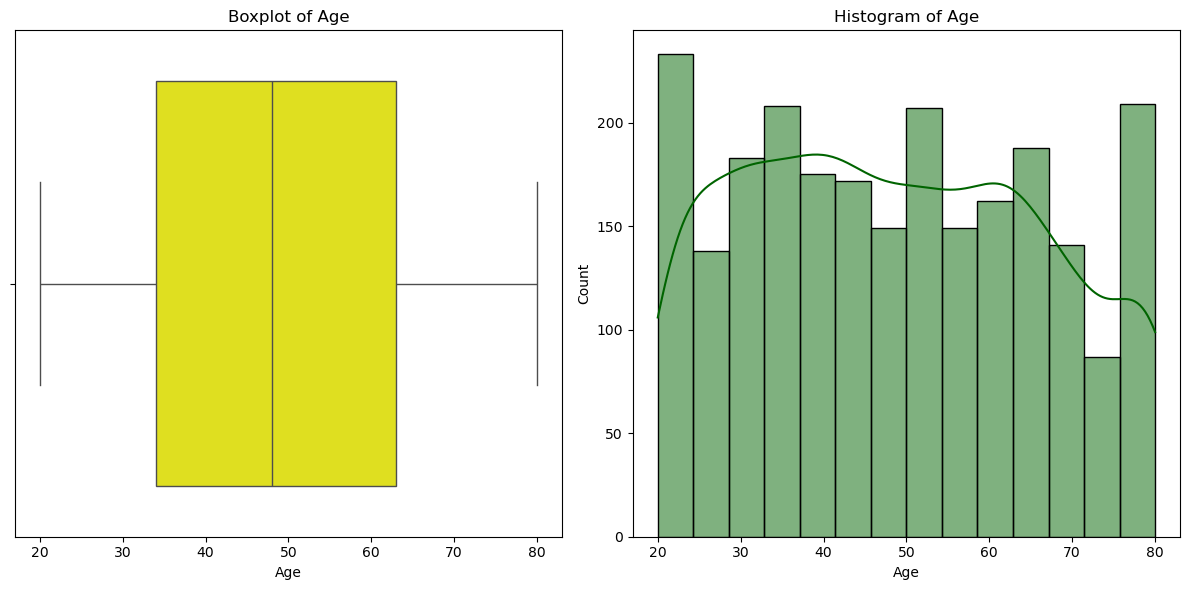

Shapiro-Wilk Test for Normality - p-value: 6.326417965832879e-26
Age does NOT follow a normal distribution.


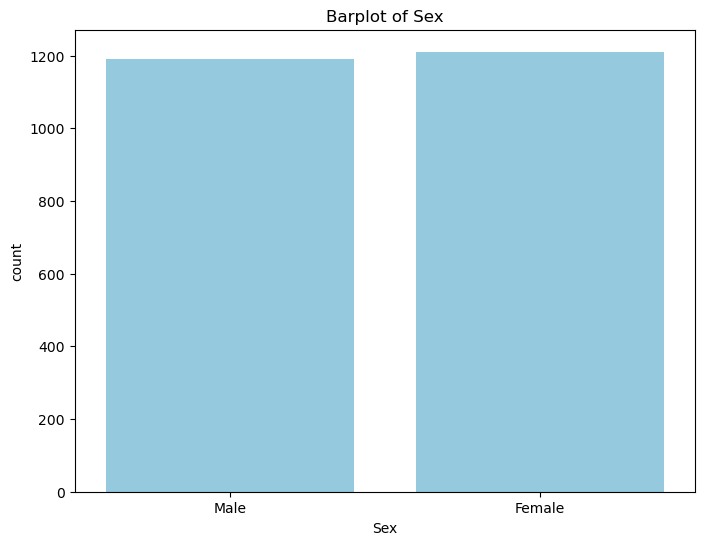

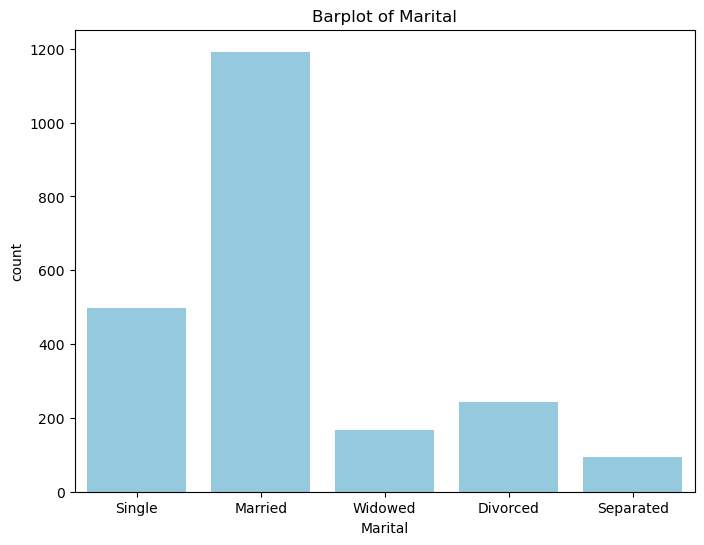

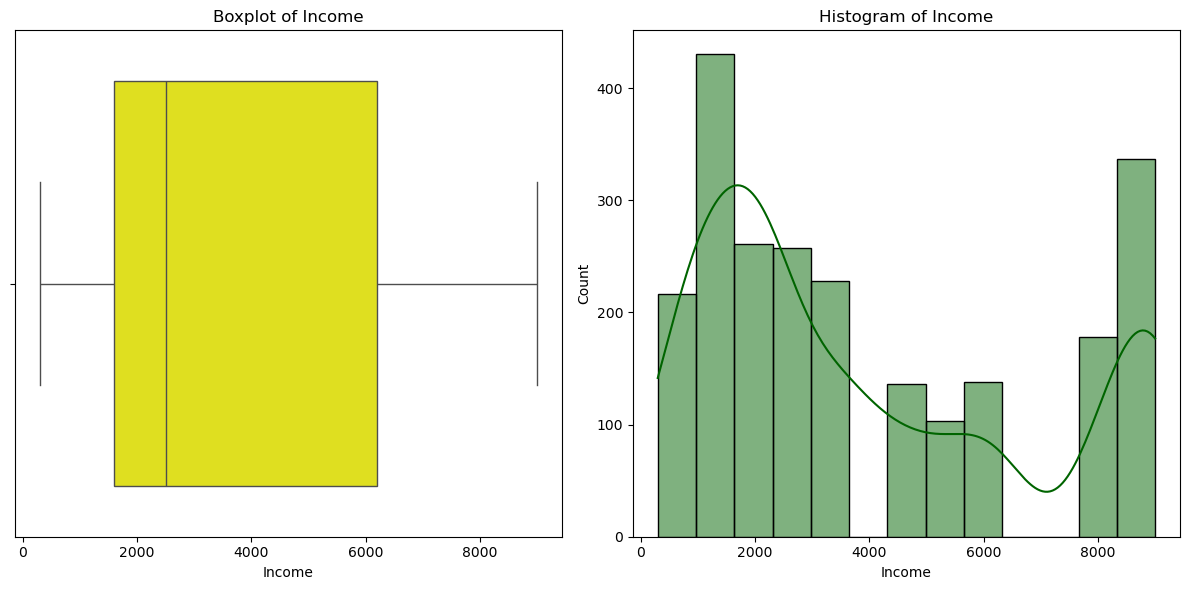

Shapiro-Wilk Test for Normality - p-value: 3.3695499612434836e-41
Income does NOT follow a normal distribution.


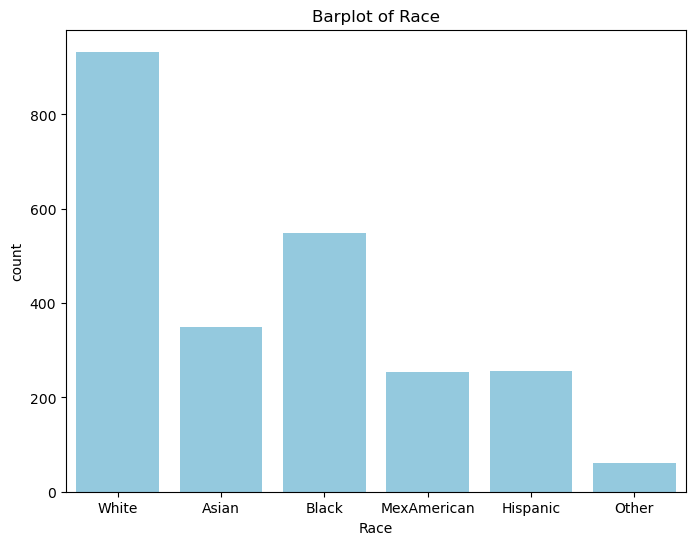

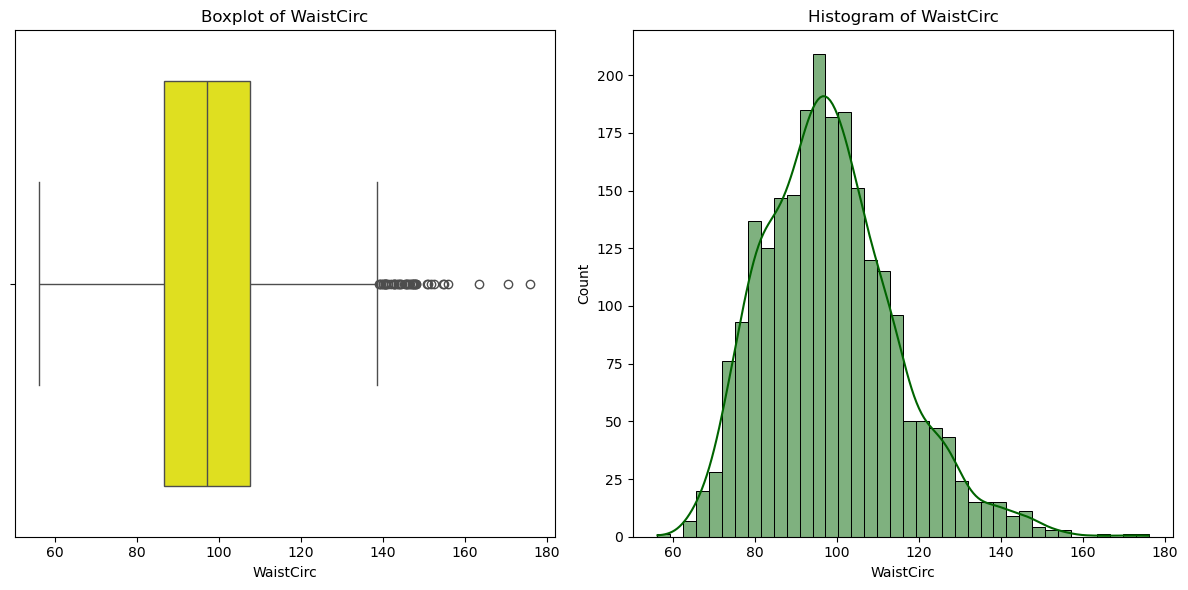

Shapiro-Wilk Test for Normality - p-value: 9.822055891596661e-19
WaistCirc does NOT follow a normal distribution.


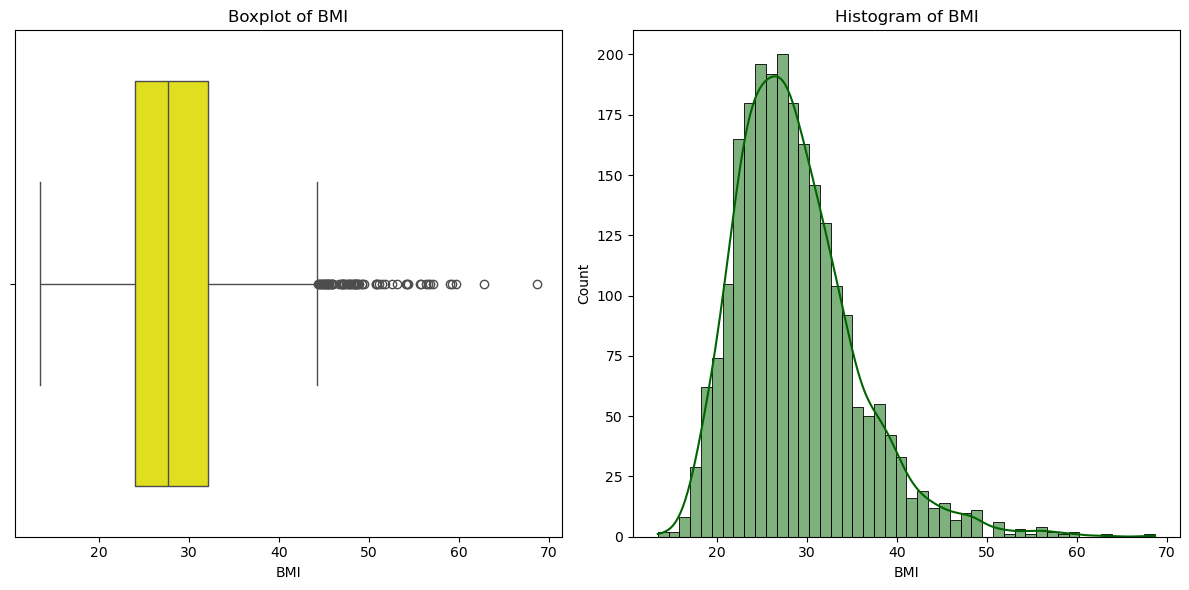

Shapiro-Wilk Test for Normality - p-value: 1.2042419327910191e-29
BMI does NOT follow a normal distribution.


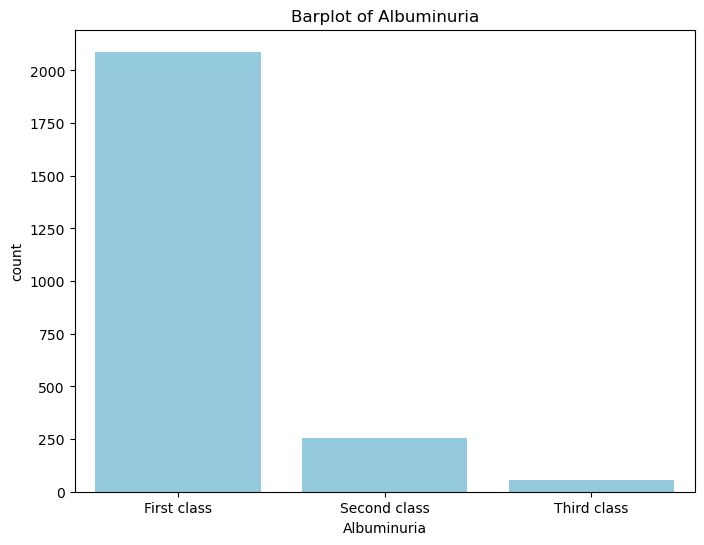

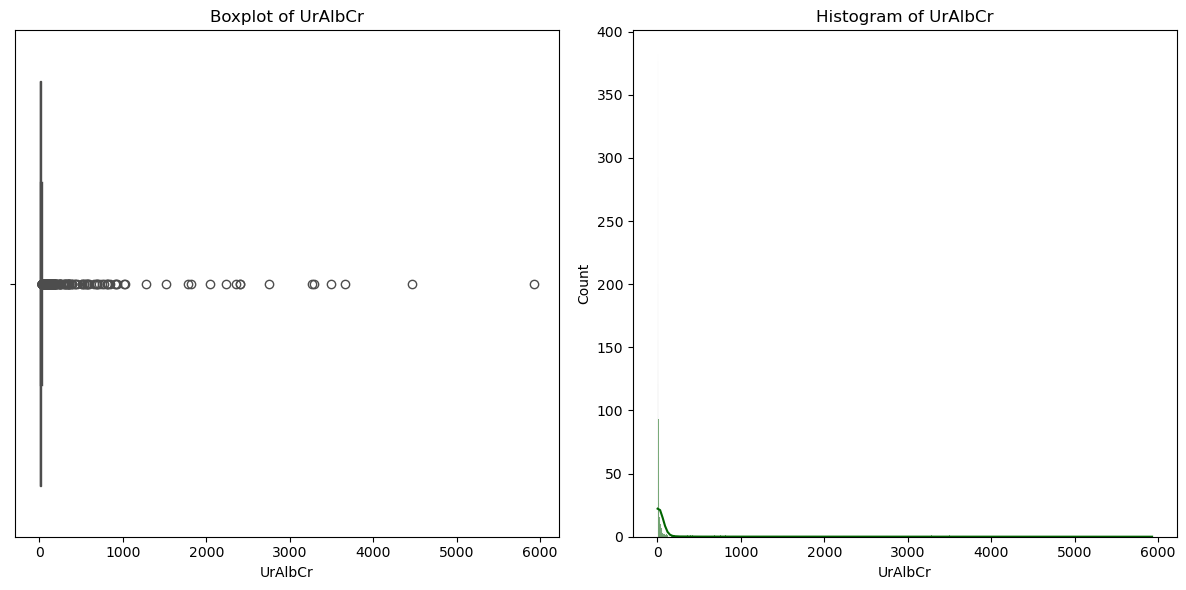

Shapiro-Wilk Test for Normality - p-value: 2.2585374821829485e-74
UrAlbCr does NOT follow a normal distribution.


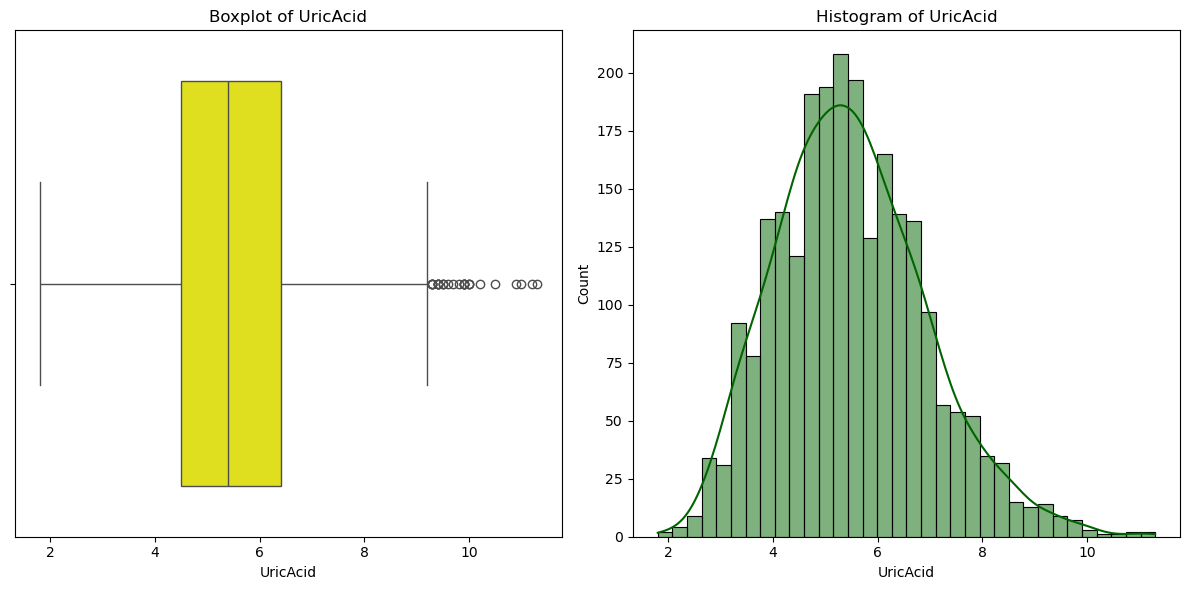

Shapiro-Wilk Test for Normality - p-value: 2.598998553346126e-14
UricAcid does NOT follow a normal distribution.


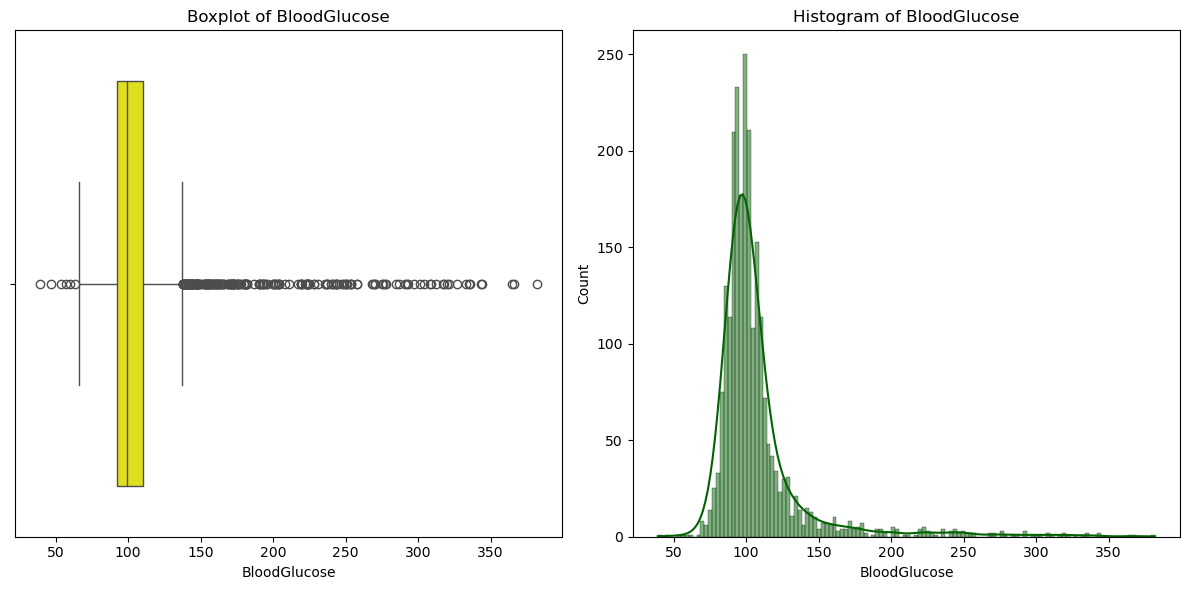

Shapiro-Wilk Test for Normality - p-value: 2.7106955757392065e-59
BloodGlucose does NOT follow a normal distribution.


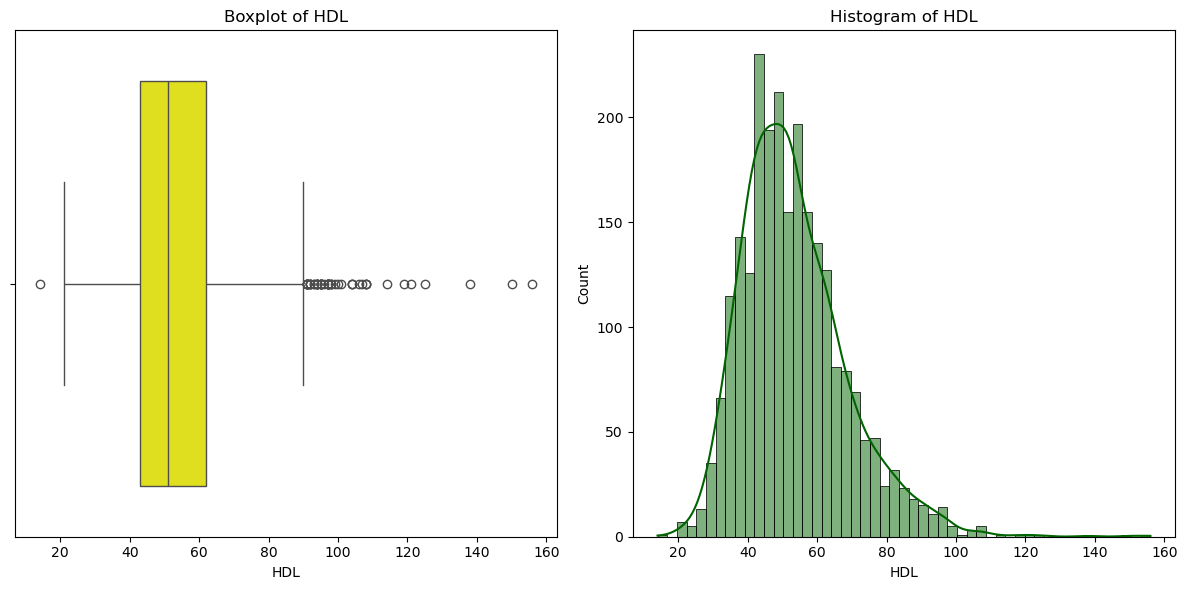

Shapiro-Wilk Test for Normality - p-value: 1.3670174351322712e-28
HDL does NOT follow a normal distribution.


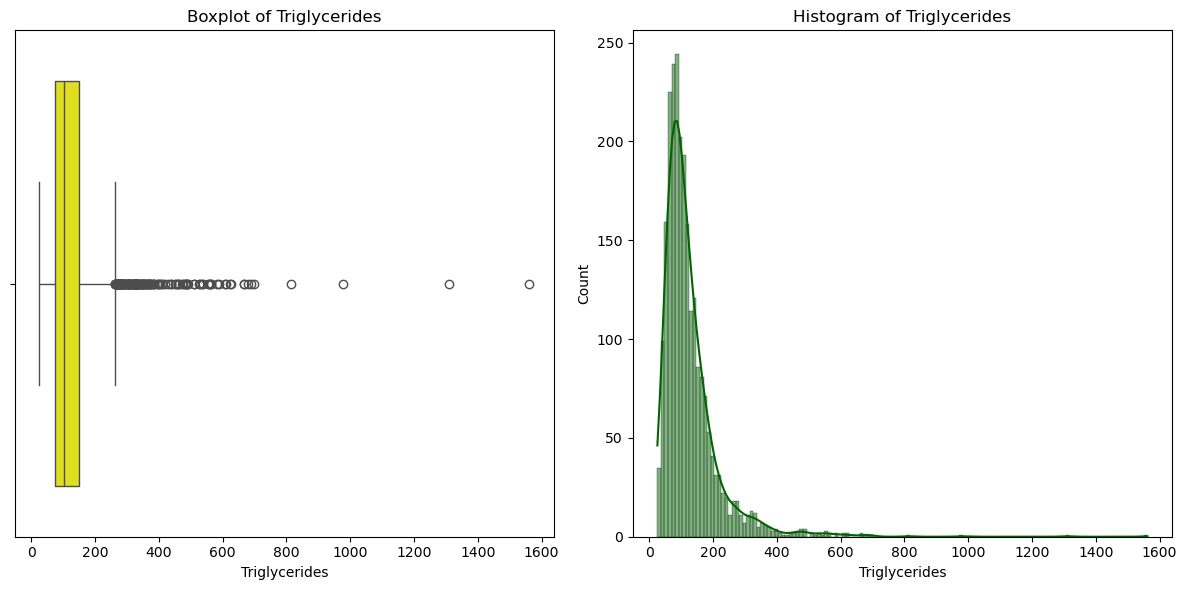

Shapiro-Wilk Test for Normality - p-value: 1.2513041365075762e-55
Triglycerides does NOT follow a normal distribution.


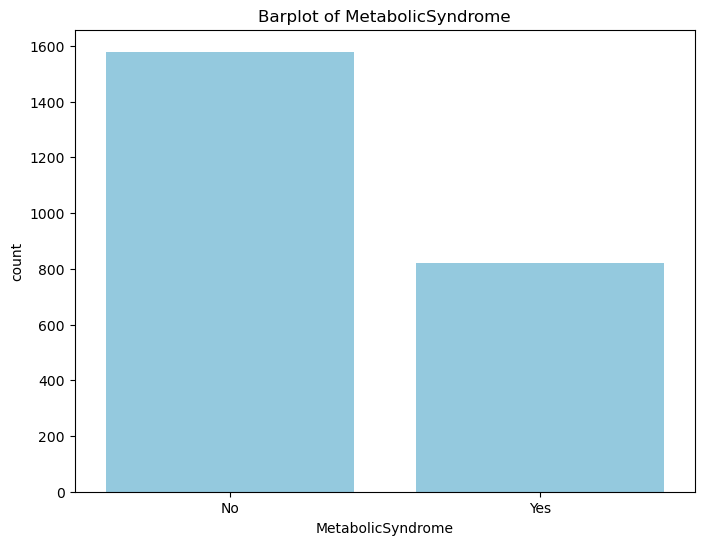

In [13]:
columns = data.columns

for column in columns:
    plot_univariate(data, column)

##### 1. **HDL (High-Density Lipoprotein) – "Good" Cholesterol:**
- **Normal Values:**
  - **Men**: 40-60 mg/dL
  - **Women**: 50-60 mg/dL
- **Low Levels** (below 40 mg/dL for men and below 50 mg/dL for women) are associated with an increased risk of cardiovascular disease.
- **High Levels** (above 60 mg/dL) are often associated with a reduced risk of heart disease.

##### 2. **Triglycerides** – Type of fat in the blood:
- **Normal Values:**
  - **Less than 150 mg/dL**
- **Elevated Levels** may indicate the risk of heart disease and other metabolic issues:
  - **150-199 mg/dL**: Borderline high
  - **200-499 mg/dL**: High
  - **500 mg/dL or more**: Very high (risk of pancreatitis)

##### 3. **Albumin-to-Creatinine Ratio in Urine (A:C):**
- **Normal Values:**
  - **A:C ratio** less than 30 mg/g
  - A ratio of **30-300 mg/g** indicates **microalbuminuria** (early sign of kidney damage).
  - A ratio **greater than 300 mg/g** indicates **macroalbuminuria**, which may indicate severe kidney damage, often associated with diabetes or hypertension.

##### 4. **Blood Glucose (Sugar):**
- **Normal Values** (for a healthy person):
  - **Fasting (after 8-12 hours of fasting)**: 70-100 mg/dL
  - **2 hours after a meal (postprandial glucose)**: Less than 140 mg/dL
- **Elevated Levels:**
  - **100-125 mg/dL** fasting: **Prediabetes**
  - **126 mg/dL or higher** fasting: **Diabetes** (requires confirmation with additional tests like the HbA1c test)

##### 5. **Uric Acid:**
- **Normal Values:**
  - **Men**: 3.5-7.2 mg/dL
  - **Women**: 2.6-6.0 mg/dL
- **Elevated Levels:**
  - High uric acid levels may lead to **gout** (a type of arthritis) or **kidney stones**.
  - **Greater than 7.2 mg/dL** in men and **greater than 6.0 mg/dL** in women are considered high and may be associated with these conditions.

##### General Overview:
- **HDL** and **Triglycerides** are key markers for cardiovascular health. Low HDL and high triglycerides increase the risk of atherosclerosis and other heart issues.
- **Albumin-to-Creatinine Ratio** is important for assessing kidney function. Elevated albumin levels in urine (albuminuria) can be an early sign of kidney damage, particularly in people with diabetes or hypertension.
- **Blood Glucose** is a key indicator of diabetes and metabolic health. Elevated levels can indicate issues with glucose metabolism.
- **Uric Acid** is important for monitoring the risk of gout and kidney problems. High levels can cause uric acid crystals to form in joints and kidneys, leading to pain and damage.

### **Outliers**

#### UrAlbCr

It is impossible for individuals to have values over 1000 mg/g because this would mean having more than one gram of albumin per gram of creatinine, which is not feasible. Therefore, individuals with an albumin-to-creatinine ratio in the blood exceeding 1000 are likely errors. We will check the number of such cases and decide on the appropriate course of action.

In [14]:
high_uralbcr = data[data["UrAlbCr"] > 1000]
high_uralbcr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 50 to 2196
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                18 non-null     int64  
 1   Sex                18 non-null     object 
 2   Marital            18 non-null     object 
 3   Income             17 non-null     float64
 4   Race               18 non-null     object 
 5   WaistCirc          17 non-null     float64
 6   BMI                17 non-null     float64
 7   Albuminuria        18 non-null     object 
 8   UrAlbCr            18 non-null     float64
 9   UricAcid           18 non-null     float64
 10  BloodGlucose       18 non-null     int64  
 11  HDL                18 non-null     int64  
 12  Triglycerides      18 non-null     int64  
 13  MetabolicSyndrome  18 non-null     object 
dtypes: float64(5), int64(4), object(5)
memory usage: 2.1+ KB


In [15]:
high_uralbcr.describe()

Age       Income   WaistCirc        BMI      UrAlbCr   UricAcid  \
count  18.000000    17.000000   17.000000  17.000000    18.000000  18.000000   
mean   63.500000  3252.941176  106.558824  31.623529  2596.463889   7.122222   
std    16.209111  2743.427976   15.329101   6.896605  1265.318775   1.358007   
min    25.000000   800.000000   75.500000  19.600000  1016.670000   4.700000   
25%    52.750000  1600.000000   93.300000  25.800000  1787.115000   6.300000   
50%    66.000000  2500.000000  111.500000  33.400000  2382.255000   7.300000   
75%    79.250000  2500.000000  115.400000  35.300000  3280.357500   8.100000   
max    80.000000  9000.000000  134.900000  42.500000  5928.000000   9.200000   

       BloodGlucose        HDL  Triglycerides  
count     18.000000  18.000000      18.000000  
mean     139.944444  52.833333     168.000000  
std       59.525054  14.625723     168.628028  
min       47.000000  29.000000      75.000000  
25%      102.500000  44.500000      92.250000  
50%      126.500000  50.500000     112.500000  
75%      153.000000  62.250000     168.250000  
max      291.000000  80.000000     814.000000

In [16]:
high_uralbcr

Age     Sex    Marital  Income         Race  WaistCirc   BMI  \
50     80    Male    Married  2500.0        White       88.6  21.7   
140    80  Female    Married  2500.0        White       97.5  30.8   
212    74  Female   Divorced   800.0        Asian      111.7  35.3   
246    50    Male  Separated  2000.0        Black       75.5  19.6   
312    39  Female     Single  9000.0        Black      118.0  37.5   
324    48    Male    Married  1500.0  MexAmerican      123.0  38.5   
418    69    Male    Married  2500.0        Asian       93.2  27.2   
872    63  Female  Separated  1600.0  MexAmerican      111.5  35.2   
891    80  Female  Separated  2500.0        Black      103.1  30.4   
910    58    Male    Married  2000.0  MexAmerican      100.6  25.6   
1086   63    Male    Married  4500.0        Black      124.5  35.0   
1438   70  Female    Married     NaN        Black      115.4   NaN   
1557   80  Female    Widowed  1600.0        Black        NaN  42.2   
2023   80  Female    Widowed  1600.0        Black       93.3  25.8   
2027   55    Male    Married  9000.0        Black      134.9  42.5   
2070   77    Male    Married  2500.0        Black       92.0  23.3   
2137   25    Male     Single  8200.0        Black      114.5  33.6   
2196   52    Male   Divorced  1000.0        White      114.2  33.4   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
50    Third class  3267.57       4.7           135   44             75   
140   Third class  3284.62       7.8           132   65            130   
212   Third class  1777.05       7.2           104   37            111   
246   Third class  2750.00       5.7           127   80             92   
312   Third class  2238.10       7.1           291   34            248   
324   Third class  2403.85       6.6           100   53            166   
418   Third class  1817.31       6.7            99   64             93   
872   Third class  1276.60       8.1            47   60            159   
891   Third class  1511.11       6.2           250   47             80   
910   Third class  3666.67       8.8           211   48            188   
1086  Third class  1024.31       5.1           180   46             85   
1438  Third class  2360.66       9.2            98   59            209   
1557  Third class  5928.00       8.1           120   60            169   
2023  Third class  2047.17       8.4           126   63             95   
2027  Third class  2403.85       8.1           159   35            105   
2070  Third class  4462.81       7.4           110   79             91   
2137  Third class  1016.67       4.9           102   48            114   
2196  Third class  3500.00       8.1           128   29            814   

     MetabolicSyndrome  
50                  No  
140                Yes  
212                Yes  
246                 No  
312                Yes  
324                Yes  
418                 No  
872                Yes  
891                Yes  
910                 No  
1086               Yes  
1438               Yes  
1557               Yes  
2023               Yes  
2027               Yes  
2070                No  
2137               Yes  
2196               Yes

There is definitely nothing unusual about them other than having excessively high albumin-to-creatinine ratio values in the blood. We will handle this by deleting these records.

In [17]:
data = data[data['UrAlbCr'] <= 1000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2383 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2383 non-null   int64  
 1   Sex                2383 non-null   object 
 2   Marital            2175 non-null   object 
 3   Income             2267 non-null   float64
 4   Race               2383 non-null   object 
 5   WaistCirc          2299 non-null   float64
 6   BMI                2358 non-null   float64
 7   Albuminuria        2383 non-null   object 
 8   UrAlbCr            2383 non-null   float64
 9   UricAcid           2383 non-null   float64
 10  BloodGlucose       2383 non-null   int64  
 11  HDL                2383 non-null   int64  
 12  Triglycerides      2383 non-null   int64  
 13  MetabolicSyndrome  2383 non-null   object 
dtypes: float64(5), int64(4), object(5)
memory usage: 279.3+ KB


#### Blood Glucose

For blood glucose, we do not know whether it was measured after a meal or on an empty stomach, which is important because the values vary and the threshold for normal blood sugar increases. Since the median is 100 mg/dL, we will assume that the measurements were taken on an empty stomach. We will use 200 mg/dl as threshold.

In [18]:
high_blod_glucose = data[data["BloodGlucose"] > 200]
high_blod_glucose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 21 to 2379
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                76 non-null     int64  
 1   Sex                76 non-null     object 
 2   Marital            67 non-null     object 
 3   Income             74 non-null     float64
 4   Race               76 non-null     object 
 5   WaistCirc          68 non-null     float64
 6   BMI                75 non-null     float64
 7   Albuminuria        76 non-null     object 
 8   UrAlbCr            76 non-null     float64
 9   UricAcid           76 non-null     float64
 10  BloodGlucose       76 non-null     int64  
 11  HDL                76 non-null     int64  
 12  Triglycerides      76 non-null     int64  
 13  MetabolicSyndrome  76 non-null     object 
dtypes: float64(5), int64(4), object(5)
memory usage: 8.9+ KB


In [19]:
high_blod_glucose.describe()

Age       Income   WaistCirc       BMI     UrAlbCr   UricAcid  \
count  76.000000    74.000000   68.000000  75.00000   76.000000  76.000000   
mean   56.473684  3054.054054  109.089706  32.33600   57.798553   5.182895   
std    14.699182  2520.773375   17.710012   7.34666  125.132466   1.364247   
min    23.000000   300.000000   73.800000  19.10000    1.870000   2.800000   
25%    44.000000  1000.000000   95.900000  27.45000    9.257500   4.100000   
50%    57.500000  2000.000000  108.400000  31.40000   18.665000   5.000000   
75%    68.500000  4500.000000  122.050000  36.30000   51.472500   6.100000   
max    80.000000  9000.000000  152.400000  54.10000  844.830000   9.700000   

       BloodGlucose        HDL  Triglycerides  
count     76.000000  76.000000      76.000000  
mean     262.355263  42.894737     226.289474  
std       45.603422  10.135849     166.131339  
min      201.000000  22.000000      39.000000  
25%      224.750000  37.000000     116.750000  
50%      249.500000  41.000000     177.000000  
75%      294.000000  47.000000     302.250000  
max      382.000000  80.000000     979.000000

In [20]:
high_blod_glucose

Age     Sex  Marital  Income         Race  WaistCirc   BMI  \
21     50    Male  Married  8200.0        White      136.1  43.4   
28     52    Male  Married  3500.0        White      110.0  31.4   
38     47  Female  Widowed  1600.0  MexAmerican      100.3  34.0   
47     80    Male  Married  9000.0        White      105.4  27.8   
165    41    Male      NaN  1000.0        Black      112.2  31.9   
...   ...     ...      ...     ...          ...        ...   ...   
2307   63  Female  Married  2000.0        White      109.5  32.8   
2325   64  Female  Married  1000.0        Asian       87.3  23.4   
2351   36  Female      NaN   300.0  MexAmerican      101.4  31.2   
2365   50  Female   Single  1500.0        Black      142.6  48.0   
2379   57  Female   Single  2500.0        White      142.7  42.4   

       Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
21     First class     4.71       6.5           204   33            192   
28    Second class   120.73       4.1           258   39            223   
38    Second class    58.06       5.1           223   51             93   
47     First class    10.52       5.8           222   39             68   
165    First class    13.72       5.2           223   46             48   
...            ...      ...       ...           ...  ...            ...   
2307   First class     5.44       6.9           208   37            231   
2325   First class    21.40       3.5           366   65            117   
2351   First class    12.73       3.9           309   37            175   
2365  Second class    59.70       6.5           276   42            298   
2379   First class     3.63       5.0           292   31            373   

     MetabolicSyndrome  
21                 Yes  
28                 Yes  
38                 Yes  
47                 Yes  
165                 No  
...                ...  
2307               Yes  
2325                No  
2351               Yes  
2365               Yes  
2379               Yes  

[76 rows x 14 columns]

Through research, we conclude that it is possible for a person to have blood glucose levels above 200 mg/dL, but this is a highly critical condition and can be life-threatening. Therefore, we will consider these values as possible.

#### Triglycerides

Very high triglyceride levels, above 500 mg/dl, can cause sweating and increase the chances of pancreatitis. Let's see which values above 500 we have.

In [21]:
high_tryglicerides = data[data["Triglycerides"] > 500]
high_tryglicerides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 14 to 2343
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25 non-null     int64  
 1   Sex                25 non-null     object 
 2   Marital            21 non-null     object 
 3   Income             24 non-null     float64
 4   Race               25 non-null     object 
 5   WaistCirc          23 non-null     float64
 6   BMI                25 non-null     float64
 7   Albuminuria        25 non-null     object 
 8   UrAlbCr            25 non-null     float64
 9   UricAcid           25 non-null     float64
 10  BloodGlucose       25 non-null     int64  
 11  HDL                25 non-null     int64  
 12  Triglycerides      25 non-null     int64  
 13  MetabolicSyndrome  25 non-null     object 
dtypes: float64(5), int64(4), object(5)
memory usage: 2.9+ KB


In [22]:
high_tryglicerides.describe()

Age       Income   WaistCirc        BMI     UrAlbCr   UricAcid  \
count  25.0000    24.000000   23.000000  25.000000   25.000000  25.000000   
mean   51.7200  3250.000000  107.043478  30.648000   81.672400   6.160000   
std    12.6607  2643.943037   13.295824   5.621545  192.436488   1.810617   
min    33.0000   300.000000   87.900000  24.200000    2.330000   3.000000   
25%    43.0000  1450.000000  100.000000  27.800000    4.200000   5.100000   
50%    49.0000  2250.000000  104.600000  28.700000    8.660000   5.900000   
75%    60.0000  4500.000000  112.800000  33.000000   44.750000   6.900000   
max    79.0000  9000.000000  146.400000  50.800000  844.830000  11.000000   

       BloodGlucose        HDL  Triglycerides  
count     25.000000  25.000000      25.000000  
mean     148.880000  34.320000     673.800000  
std       71.111016  12.119956     251.341899  
min       75.000000  21.000000     510.000000  
25%      101.000000  27.000000     553.000000  
50%      126.000000  32.000000     589.000000  
75%      158.000000  35.000000     668.000000  
max      335.000000  77.000000    1562.000000

In [23]:
high_tryglicerides

Age     Sex    Marital  Income         Race  WaistCirc   BMI  \
14     62  Female  Separated  2500.0  MexAmerican       92.9  26.0   
124    34    Male    Married  4500.0  MexAmerican        NaN  33.8   
148    54    Male   Divorced  6200.0        White      127.7  36.1   
514    42    Male    Married  9000.0        White      104.6  28.7   
650    35    Male    Married  2500.0        White      104.8  29.1   
681    74    Male   Divorced  1600.0        White      107.2  27.9   
727    43    Male    Married  2500.0        Asian       87.9  24.2   
829    50    Male     Single  1600.0  MexAmerican       92.9  27.6   
1016   58    Male    Married  9000.0        White       97.6  28.5   
1115   60    Male   Divorced   800.0        White      124.5  36.5   
1272   42    Male    Married  6200.0        Black      146.4  50.8   
1321   33    Male        NaN  3500.0  MexAmerican      105.7  32.7   
1384   45    Male   Divorced     NaN     Hispanic        NaN  28.0   
1423   66    Male    Married  4500.0        White      103.9  26.5   
1590   79  Female    Married  2000.0        White      100.0  25.4   
1595   44    Male   Divorced  1000.0     Hispanic      103.4  30.1   
1680   53  Female    Married  1000.0        Black      114.2  33.2   
1740   43  Female        NaN  1600.0     Hispanic       90.2  28.1   
1777   75    Male    Married  3500.0        White      116.9  38.7   
1979   47    Male    Widowed  2000.0  MexAmerican      105.7  30.2   
2066   49    Male    Married  1000.0        White      100.0  27.8   
2076   52    Male        NaN   300.0        White      103.5  24.9   
2092   45  Female        NaN  2000.0        White      102.2  28.1   
2138   63    Male    Married  8200.0        White      118.4  30.3   
2343   45  Female    Married  1000.0        White      111.4  33.0   

       Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
14     First class     2.33       3.6           138   31            565   
124    First class     8.08       7.3           158   29            589   
148    First class     4.20       5.1            98   34            668   
514    First class     3.93       5.7           100   30            624   
650    First class     8.66       6.8           108   27            626   
681    Third class   454.74       7.6           140   21            681   
727    First class    10.97       7.3           114   39            584   
829    Third class   844.83       4.2           335   35            979   
1016   First class     7.65       4.9           126   28           1311   
1115   First class    10.50       6.9           119   25            560   
1272   First class     4.02       6.4           301   32            510   
1321   First class     3.64       6.7            95   34            564   
1384   First class     5.41       5.9           101   37            553   
1423   First class     6.49       3.0            96   57            528   
1590   Third class   339.61      11.0           147   34            539   
1595  Second class    73.37       5.8           173   25            610   
1680  Second class    90.47      10.2           112   77            535   
1740   First class    23.25       5.0           318   32            688   
1777   First class    13.39       5.6           162   28            559   
1979  Second class    47.09       3.9           219   32            666   
2066   First class     3.41       6.5           144   24            526   
2076   First class     3.00       5.4            91   52            700   
2092   First class    23.28       6.5            75   27           1562   
2138   First class     4.74       7.3           110   42            511   
2343  Second class    44.75       5.4           142   26            607   

     MetabolicSyndrome  
14                 Yes  
124                Yes  
148                Yes  
514                Yes  
650                Yes  
681                Yes  
727                Yes  
829                Yes  
1016     

What can be noticed is that the HDL level decreases as triglycerides increase. This is normal, but no other irregularities can be observed. They have slightly higher blood sugar, but everything else could be considered normal. We assume that these are patients under observation and their blood was taken for the dataset due to diversity.

#### HDL

An elevated, or abnormally high, HDL level is anything above 80 mg/dL. One thing that can make your HDL cholesterol high is a genetic mutation. Some mutations to your genes can cause your body to produce too much HDL cholesterol or have trouble getting rid of it.

In [24]:
high_hdl = data[data["HDL"] > 80]
high_hdl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 32 to 2397
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                134 non-null    int64  
 1   Sex                134 non-null    object 
 2   Marital            124 non-null    object 
 3   Income             127 non-null    float64
 4   Race               134 non-null    object 
 5   WaistCirc          127 non-null    float64
 6   BMI                132 non-null    float64
 7   Albuminuria        134 non-null    object 
 8   UrAlbCr            134 non-null    float64
 9   UricAcid           134 non-null    float64
 10  BloodGlucose       134 non-null    int64  
 11  HDL                134 non-null    int64  
 12  Triglycerides      134 non-null    int64  
 13  MetabolicSyndrome  134 non-null    object 
dtypes: float64(5), int64(4), object(5)
memory usage: 15.7+ KB


In [25]:
high_hdl.describe()

Age       Income   WaistCirc         BMI     UrAlbCr  \
count  134.000000   127.000000  127.000000  132.000000  134.000000   
mean    53.761194  4539.370079   87.634646   24.784848   33.899254   
std     17.519990  3129.662426   14.210668    5.403526  100.191839   
min     20.000000   300.000000   56.200000   13.400000    1.540000   
25%     39.000000  1700.000000   78.150000   21.575000    5.585000   
50%     55.000000  3500.000000   85.700000   23.750000    8.700000   
75%     68.000000  8200.000000   95.400000   27.225000   18.855000   
max     80.000000  9000.000000  176.000000   55.700000  716.510000   

         UricAcid  BloodGlucose         HDL  Triglycerides  
count  134.000000    134.000000  134.000000      134.00000  
mean     5.093284     98.067164   91.514925       85.88806  
std      1.437374     15.535648   12.084126       39.85588  
min      2.200000     69.000000   81.000000       26.00000  
25%      4.000000     89.000000   84.000000       62.00000  
50%      4.950000     96.000000   88.500000       76.50000  
75%      5.900000    103.000000   95.000000       96.75000  
max      9.500000    181.000000  156.000000      239.00000

In [26]:
high_hdl

Age     Sex    Marital  Income   Race  WaistCirc   BMI   Albuminuria  \
32     64  Female    Married  4500.0  White        NaN  25.6   First class   
93     54    Male   Divorced  5400.0  White      105.4  31.2   First class   
156    28    Male     Single  2000.0  Other       92.3  25.4   First class   
195    55  Female  Separated  1600.0  Black       76.1  20.3   First class   
205    38  Female    Married  9000.0  Asian       66.2  18.5   First class   
...   ...     ...        ...     ...    ...        ...   ...           ...   
2313   44  Female   Divorced  1000.0  White       92.4  24.2   First class   
2333   61    Male        NaN   300.0  Black       86.5  22.3   First class   
2339   70  Female    Widowed     NaN  Black       94.2  26.0  Second class   
2352   80  Female    Widowed  1600.0  White       72.3  20.8   First class   
2397   30  Female     Single  2000.0  Asian        NaN  18.0   First class   

      UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides MetabolicSyndrome  
32       6.72       3.2            91   85             88                No  
93       5.07       6.5           124   93             95               Yes  
156      9.46       8.5            99   92             45                No  
195     22.91       5.5            83  119             46                No  
205      8.10       4.3            94   83            107                No  
...       ...       ...           ...  ...            ...               ...  
2313     3.44       4.4            86  104            133                No  
2333     3.42       5.8           106  114             75                No  
2339    34.41       6.4           126   93             59               Yes  
2352    18.00       2.2           100   83             60                No  
2397     2.90       7.9            91   90             91                No  

[134 rows x 14 columns]

In [27]:
high_hdl[high_hdl["Triglycerides"] == 239]

Age     Sex  Marital  Income   Race  WaistCirc  BMI  Albuminuria  \
2020   55  Female  Married  1600.0  White        NaN  NaN  First class   

      UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides MetabolicSyndrome  
2020     9.32       7.9            84  108            239                No

This is high level of both HDL and Tryglicerides and question is, is this possible?

In [28]:
high_hdl[high_hdl["Triglycerides"] > 150]

Age     Sex    Marital  Income   Race  WaistCirc   BMI   Albuminuria  \
609    36    Male    Married  1700.0  Asian       78.8  19.9   Third class   
714    34  Female    Married  6200.0  White      113.3  29.2   First class   
850    60  Female  Separated  1600.0  Black       80.7  21.9  Second class   
1234   80  Female    Widowed  2000.0  White       97.8  25.5  Second class   
1370   37  Female    Married  8200.0  White      113.3  29.4   First class   
1951   36  Female    Married  9000.0  White      112.0  36.9  Second class   
2011   51    Male    Married  3500.0  Asian       94.7  27.2   Third class   
2020   55  Female    Married  1600.0  White        NaN   NaN   First class   
2303   80  Female    Married  3500.0  White       88.5  26.6   First class   
2311   35    Male     Single   800.0  White       79.8  22.4   First class   

      UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides MetabolicSyndrome  
609    507.39       4.0           142   97            180                No  
714      3.14       4.2            78   88            181                No  
850     31.29       8.5           110   81            238               Yes  
1234    46.10       3.5           119   88            159               Yes  
1370     1.54       6.5            80   83            215                No  
1951    37.98       4.1            80   90            217                No  
2011   348.74       7.3           146   83            222                No  
2020     9.32       7.9            84  108            239                No  
2303     7.88       4.4            98   84            152                No  
2311    15.68       5.3            94   94            163                No

We have a couple of patients with this situation. Now, we will consider this as normal.

#### Summary

**Here are some important questions for consideration:**

1. Is it possible for certain patients to have an albumin-to-creatinine ratio in their blood exceeding 1000 mg/g? Could this be due to errors in measurement, or is it a legitimate result?

2. Can blood sugar levels really exceed 200 mg/dl, and if so, what factors might contribute to such high readings?

3. Is it feasible for patients to have triglyceride levels above 500 mg/dl, and if so, do these individuals also have an increased risk of developing pancreatitis?

4. Can HDL levels surpass 80 mg/dl, and if they can, what might explain the presence of patients with both high HDL and elevated triglycerides simultaneously?


### **Missing Values**

In [29]:
data.isnull().sum()

Age                    0
Sex                    0
Marital              208
Income               116
Race                   0
WaistCirc             84
BMI                   25
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

For the missing values, we will use the KNN imputer, considering that we have a small percentage of them.

In [30]:
label_encoders = {}
categorical_columns = ['Sex', 'Marital', 'Race', 'Albuminuria', 'MetabolicSyndrome']  

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

numerical_columns = ['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']

numerical_data = data[numerical_columns]

knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = numerical_data.copy()
df_imputed[:] = knn_imputer.fit_transform(numerical_data)

data[numerical_columns] = df_imputed

for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

for col, le in label_encoders.items():
    data[col] = le.inverse_transform(data[col])

In [31]:
data.isna().sum()

Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

### **Multivariate Data Analysis**

In [32]:
def plot_target_relationship(data, target_column, feature_column):
    if data[feature_column].dtype in ['int64', 'float64']:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.boxplot(x=data[target_column], y=data[feature_column], ax=axes[0], color="yellow")
        axes[0].set_title(f'Boxplot of {feature_column} by {target_column}')
        
        sns.histplot(data, x=feature_column, hue=target_column, kde=True, ax=axes[1], palette='Set2', bins=20)
        axes[1].set_title(f'Histogram of {feature_column} by {target_column}')
        
        plt.tight_layout()
        plt.show()
        
        group1 = data[data[target_column] == "No"][feature_column]
        group2 = data[data[target_column] == "Yes"][feature_column]
        
        if len(group1) > 0 and len(group2) > 0:
            u_stat, u_p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            print(f"Mann-Whitney U test p-value: {u_p_value}")
        else:
            print("One of the groups is NaN!")
    
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature_column, hue=target_column, data=data, palette='Set2')
        plt.title(f'Countplot of {feature_column} by {target_column}')
        plt.show()
        
        crosstab = pd.crosstab(data[feature_column], data[target_column])
        chi2_stat, chi2_p_value, _, _ = stats.chi2_contingency(crosstab)
        print(f"Chi-square Test for {feature_column} by {target_column} - p-value: {chi2_p_value}")


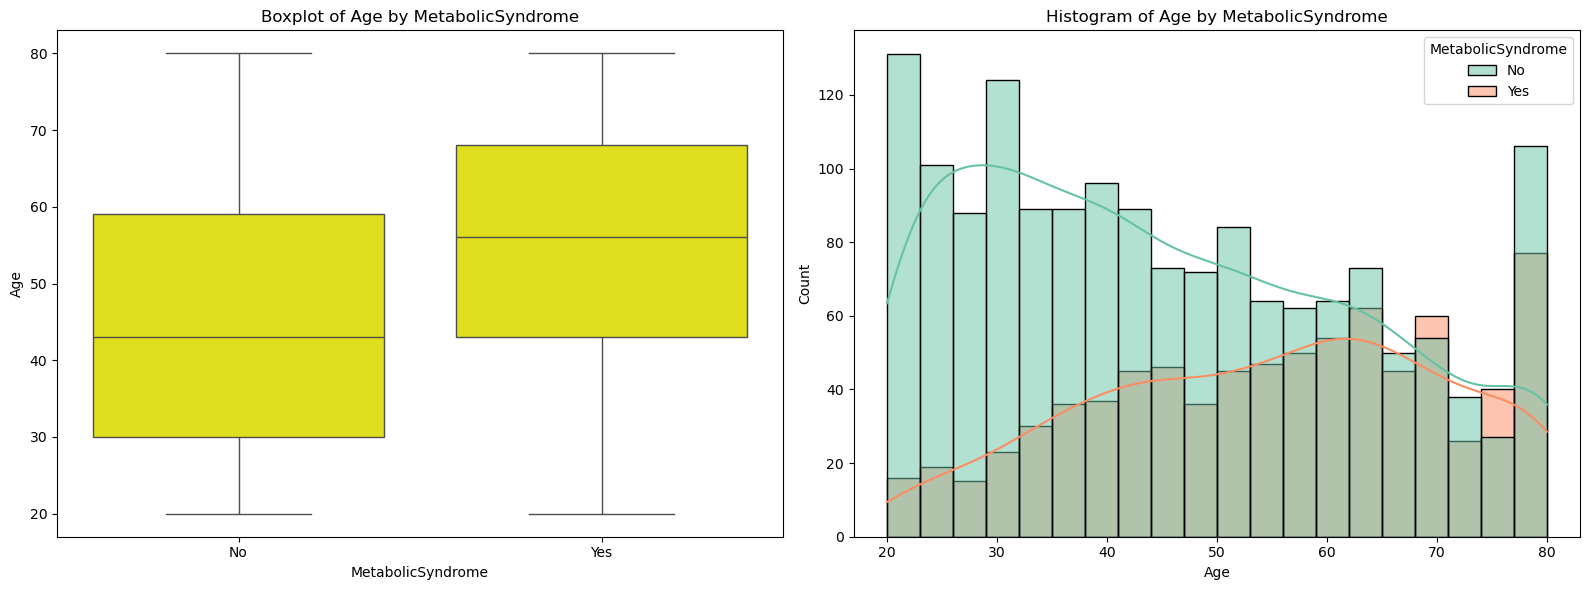

Mann-Whitney U test p-value: 1.131383142418943e-34


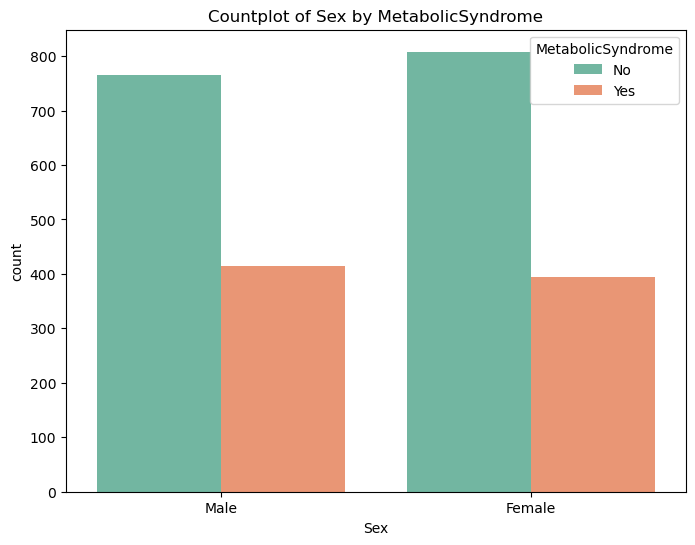

Chi-square Test for Sex by MetabolicSyndrome - p-value: 0.264202634349091


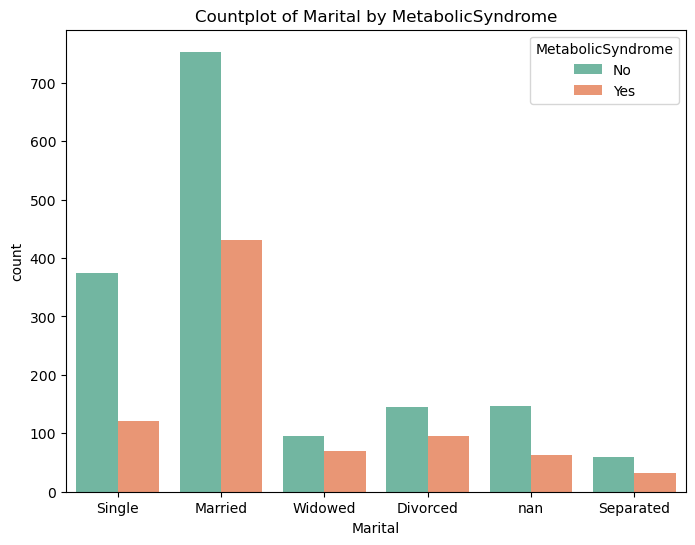

Chi-square Test for Marital by MetabolicSyndrome - p-value: 3.643052106414656e-06


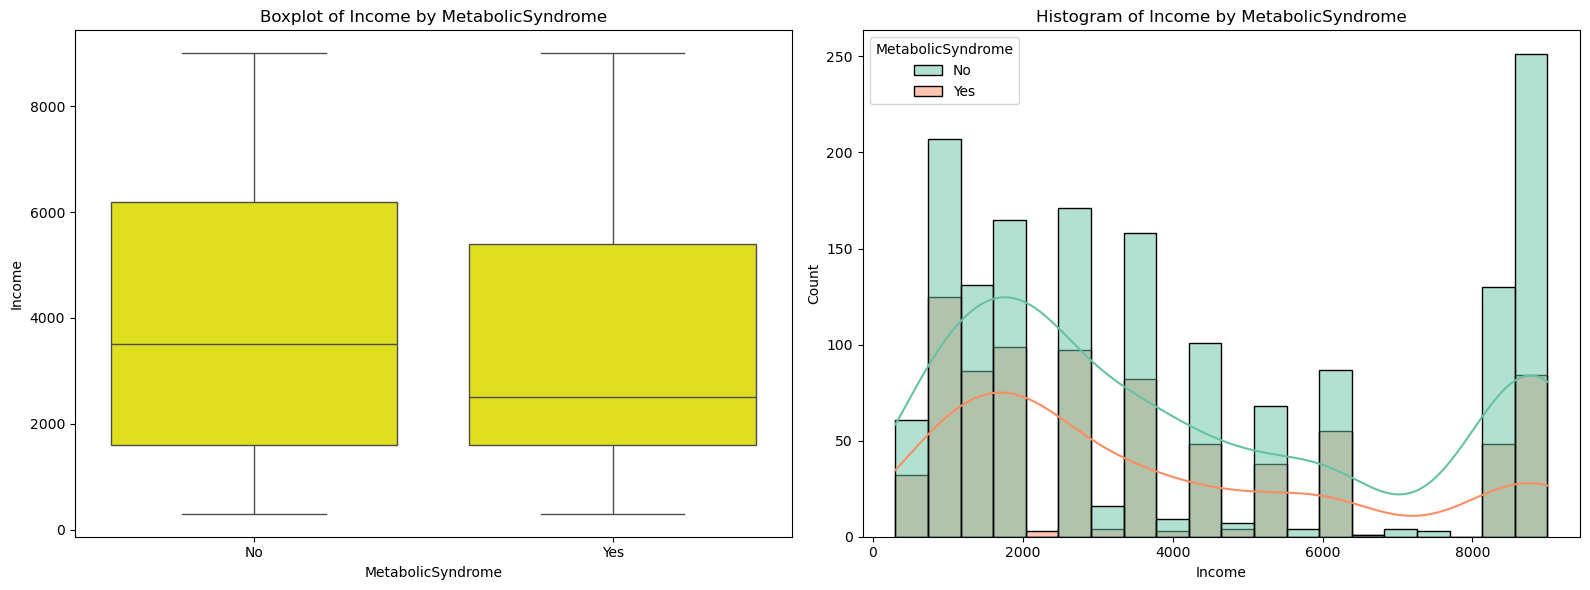

Mann-Whitney U test p-value: 6.169764549117462e-05


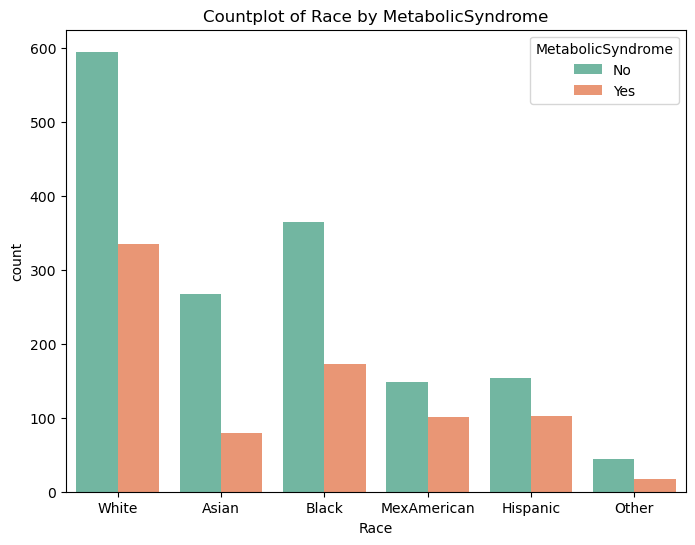

Chi-square Test for Race by MetabolicSyndrome - p-value: 9.940822921760142e-06


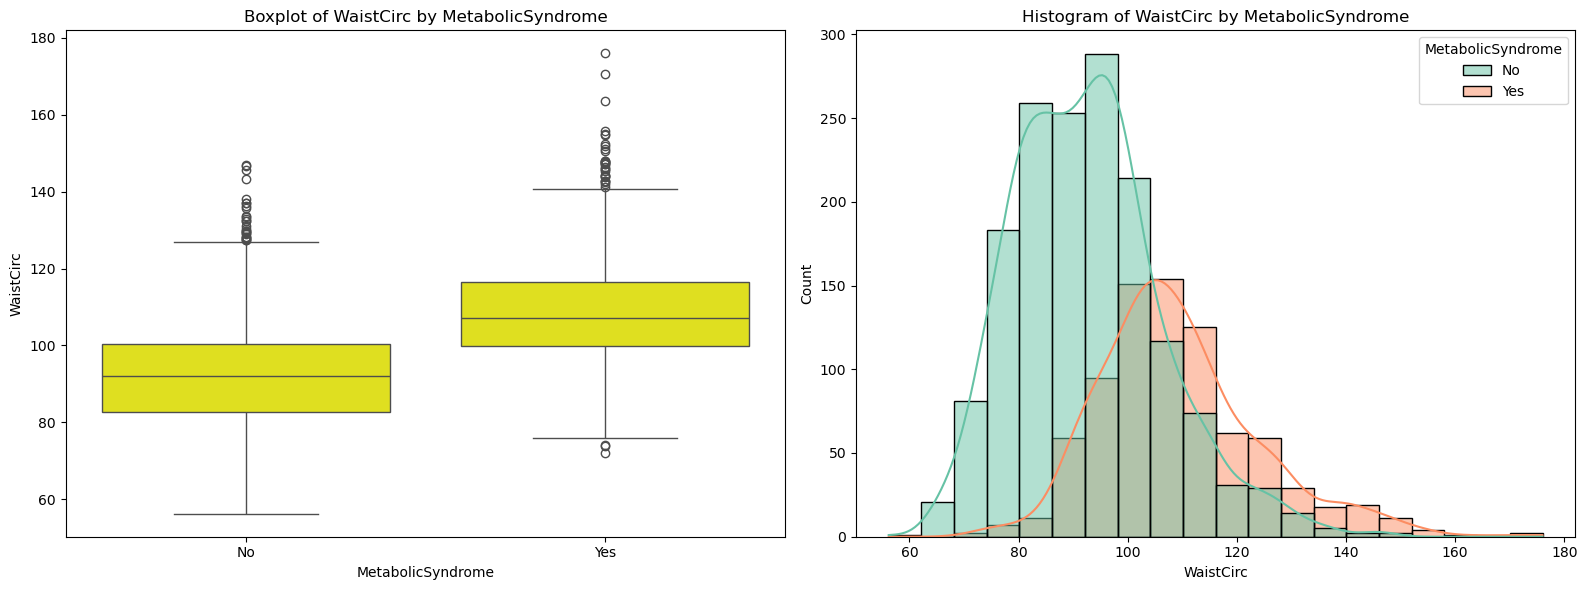

Mann-Whitney U test p-value: 1.5654587593004167e-134


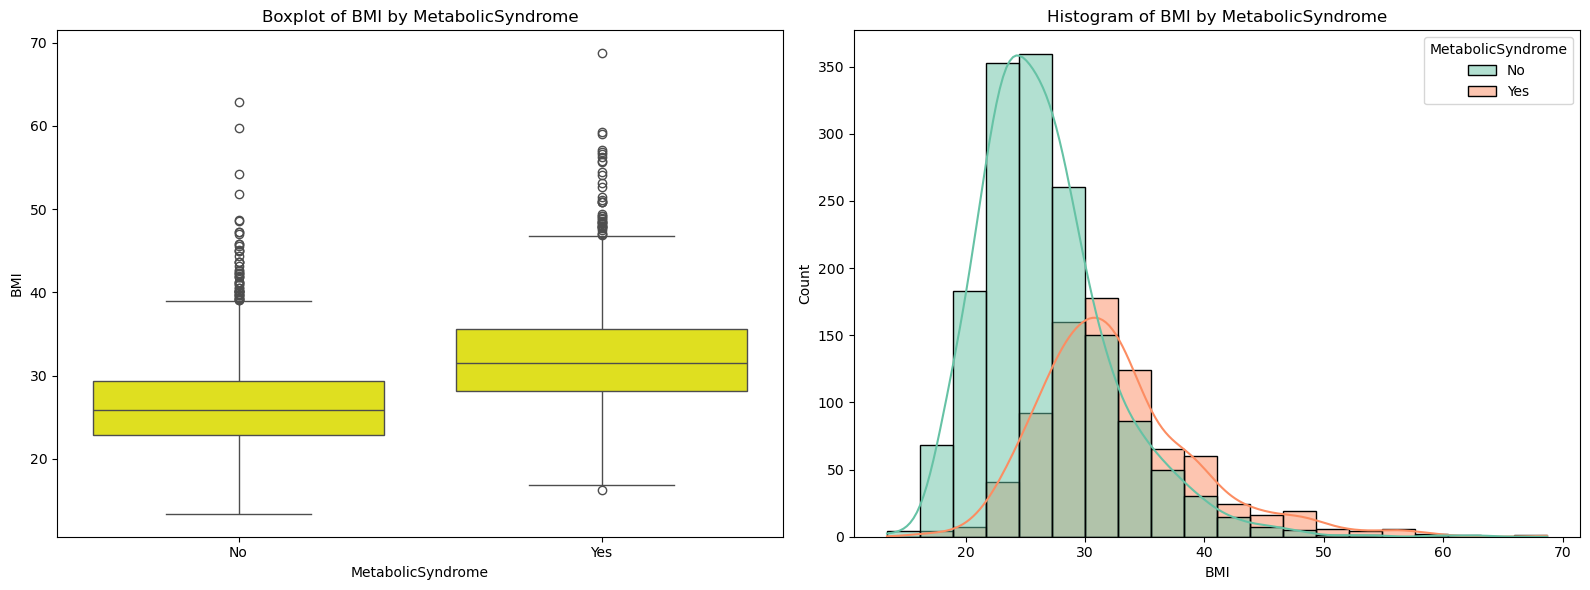

Mann-Whitney U test p-value: 1.2508228762960054e-108


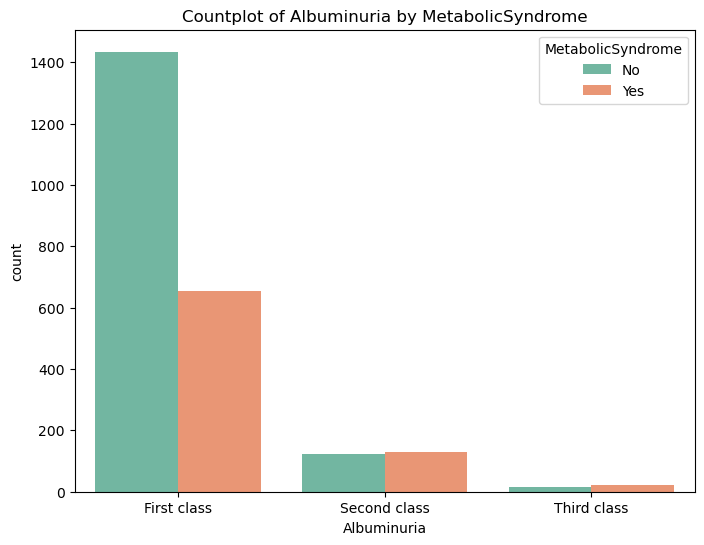

Chi-square Test for Albuminuria by MetabolicSyndrome - p-value: 7.054789787474503e-12


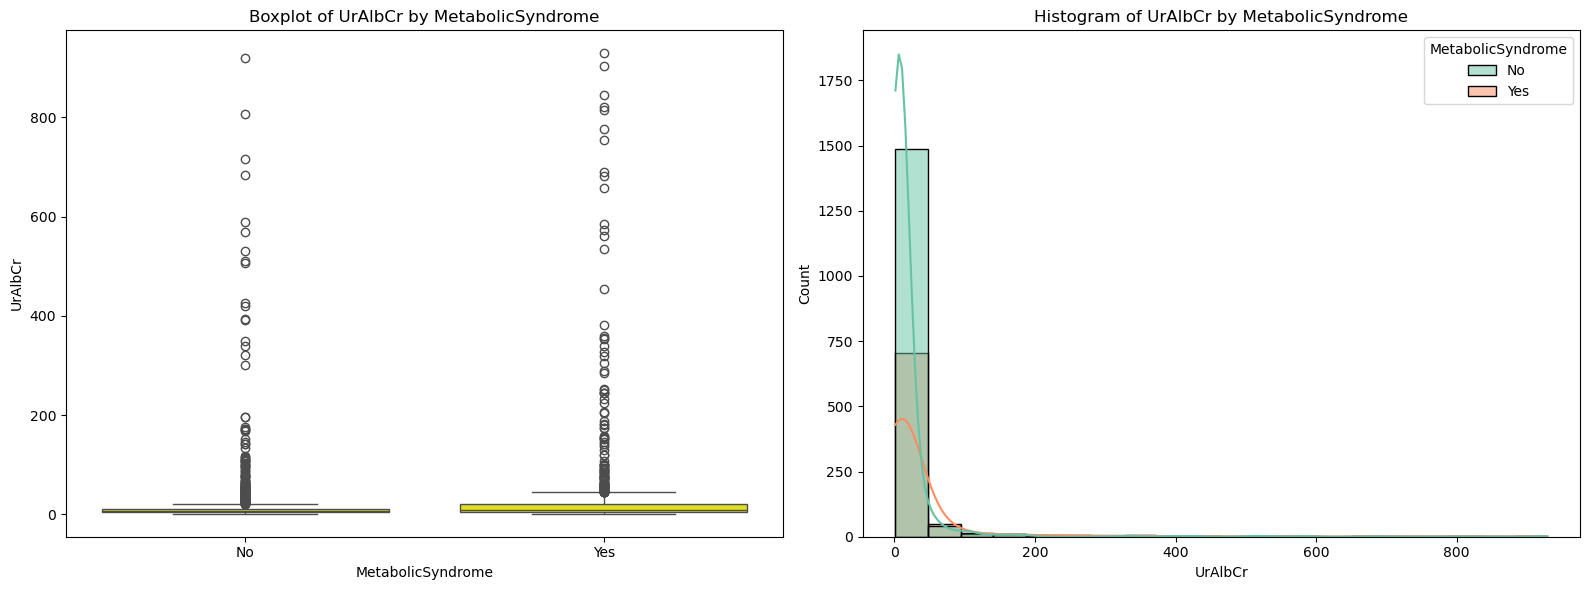

Mann-Whitney U test p-value: 4.0001813987981593e-19


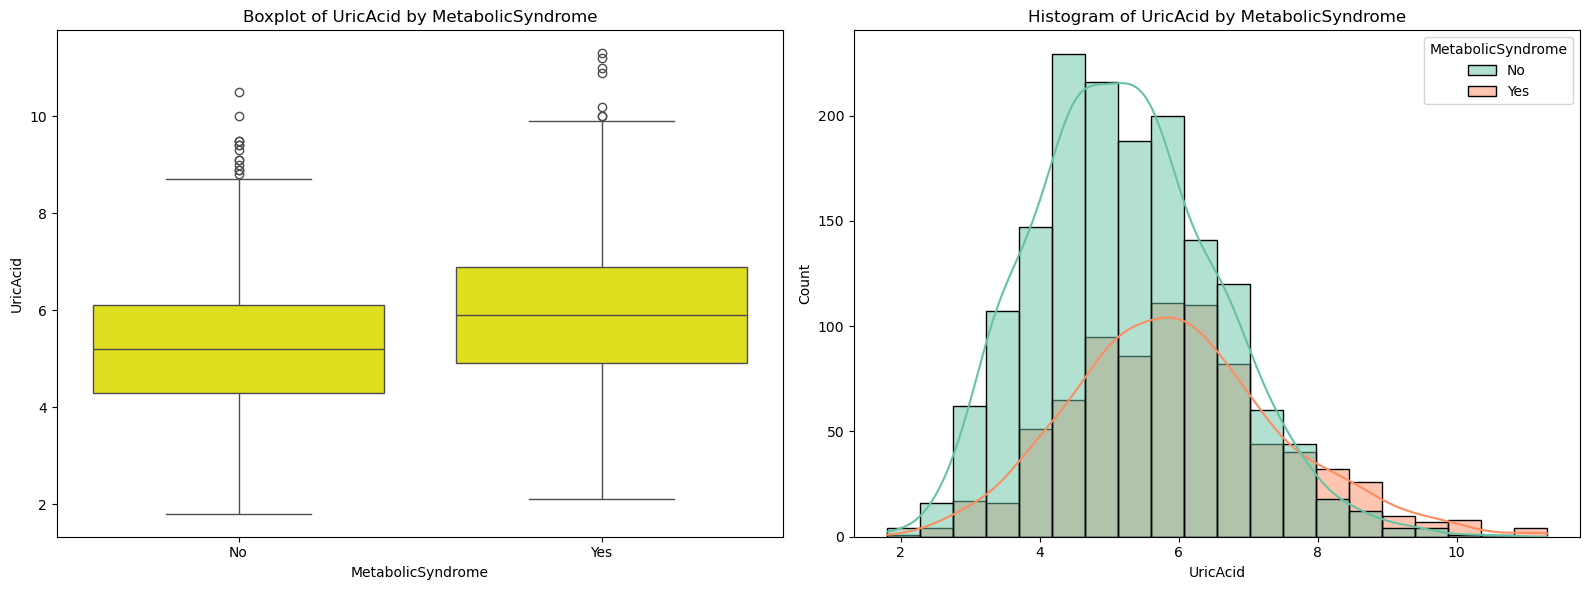

Mann-Whitney U test p-value: 2.631447998403217e-29


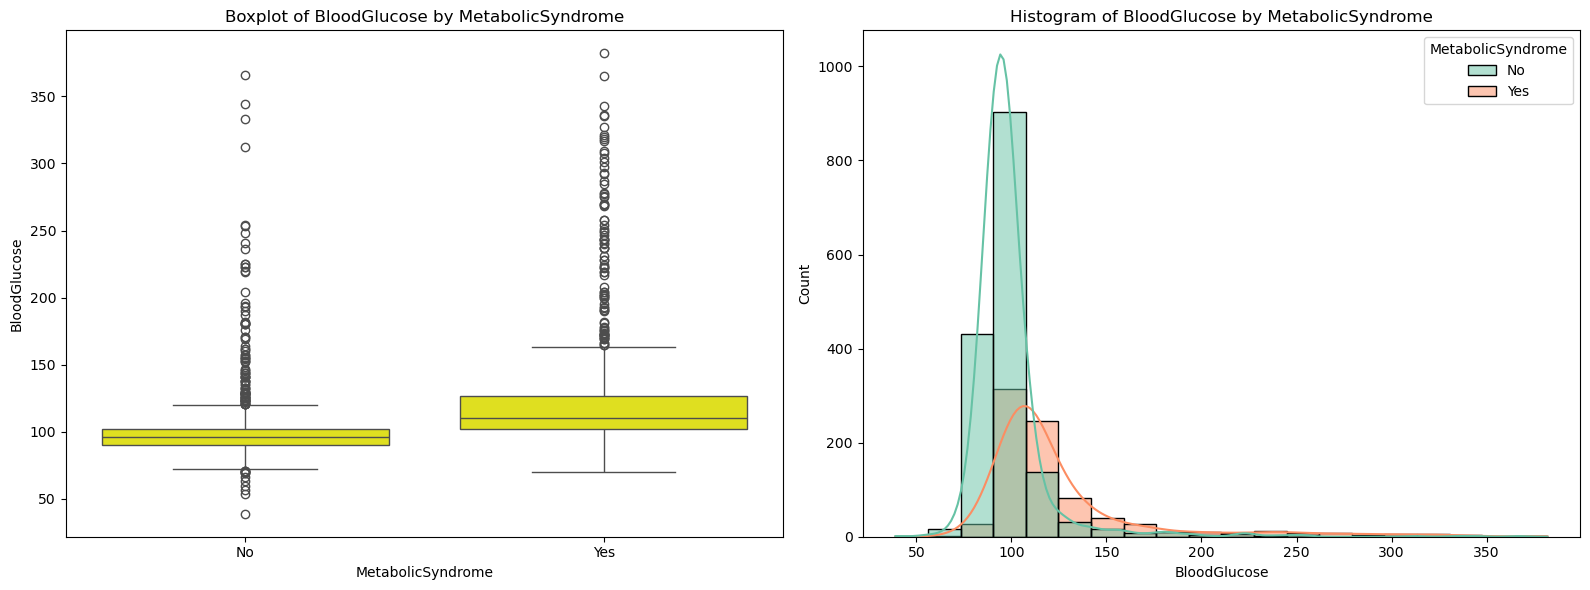

Mann-Whitney U test p-value: 4.787999417255052e-145


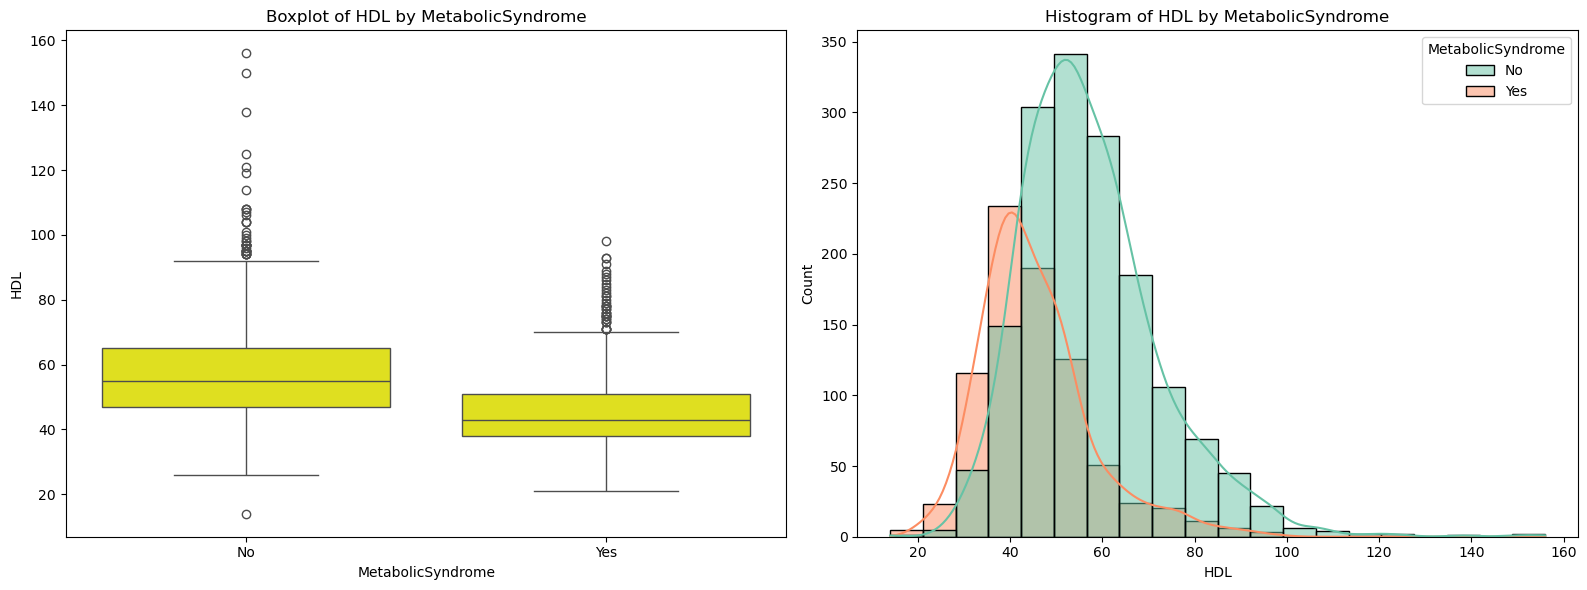

Mann-Whitney U test p-value: 3.5560890301621454e-91


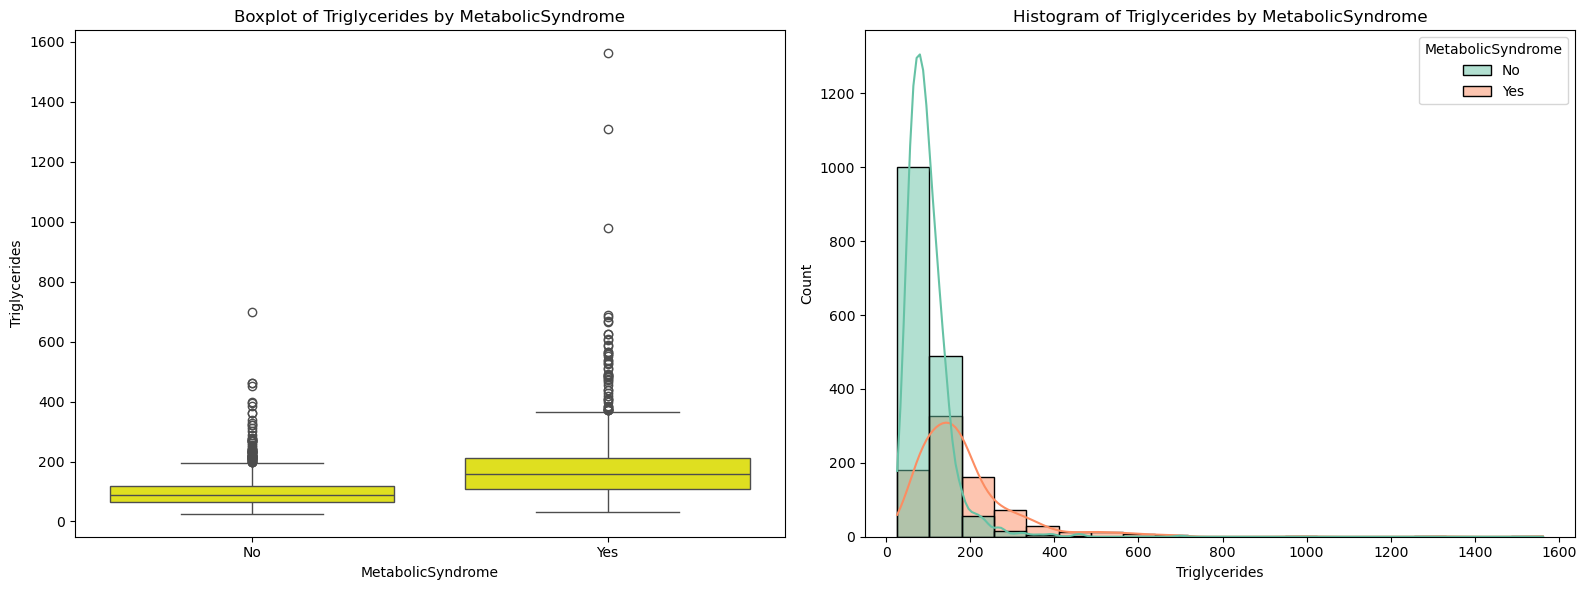

Mann-Whitney U test p-value: 6.125580111613288e-122


In [33]:
for column in columns:
    if column != "MetabolicSyndrome":
        plot_target_relationship(data, "MetabolicSyndrome", column)

The **Mann-Whitney U test** is a non-parametric test used to compare the distributions of two independent groups when the data is ordinal or not normally distributed. The null hypothesis (H₀) assumes no difference between the groups, and the alternative hypothesis (H₁) assumes a difference exists. A p-value less than 0.05 indicates a significant difference between the groups. The **Chi-square test** is used to assess the association between two categorical variables. It tests whether the observed frequencies differ significantly from the expected frequencies, with the null hypothesis (H₀) stating that the variables are independent, and the alternative hypothesis (H₁) stating that there is an association. A p-value less than 0.05 indicates a significant association between the variables. From these results, we can see all predictors are significant for our target except Gender. Let's now see pairplot.

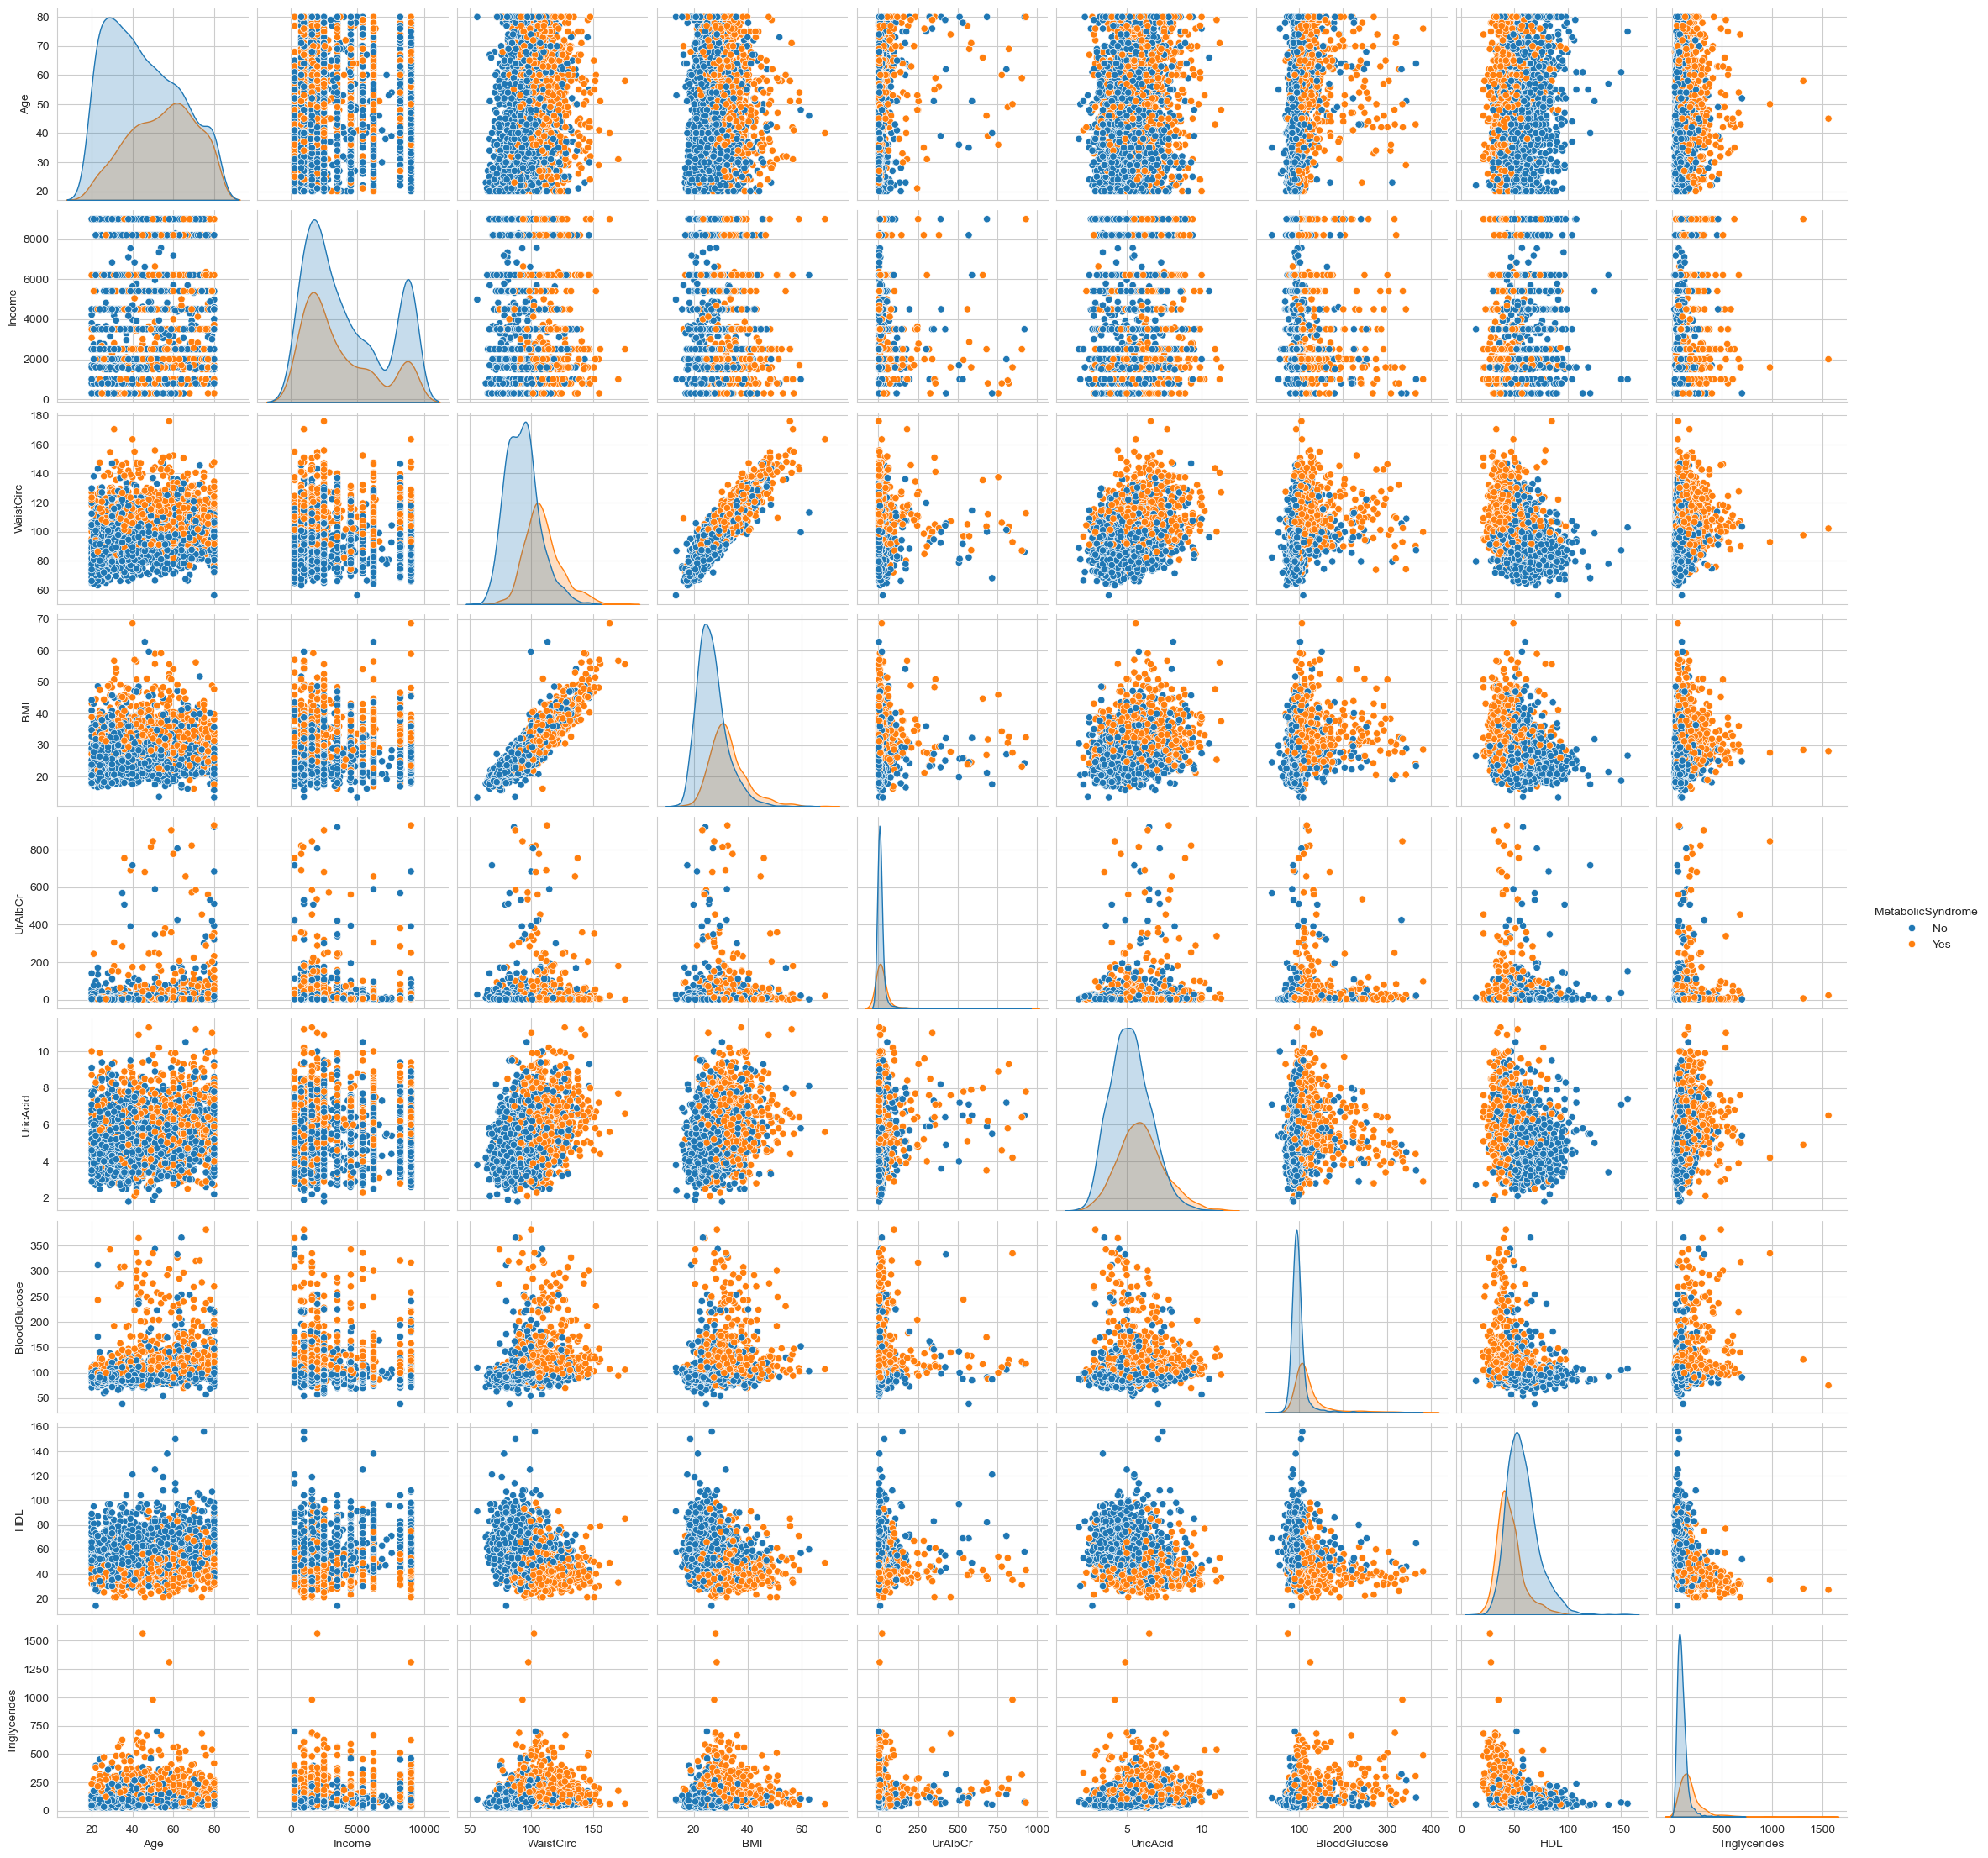

In [34]:
sns.set_style("whitegrid")
sns.pairplot(data, hue = "MetabolicSyndrome")
plt.show()

The pairplot shows that there are no sufficiently good pairs of predictors that effectively separate metabolic syndrome, as there is a lot of overlap. For the model, we will use the significance tests we performed and include the predictors that were found to be significant.

## **Feature Engineering and Data Preparation**

Now, we will create new predictors with available features and test their importance to our target variable.

In [35]:
data.columns

Index(['Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [36]:
data["HDL_Triglycerides"] = data["HDL"] / data["Triglycerides"]

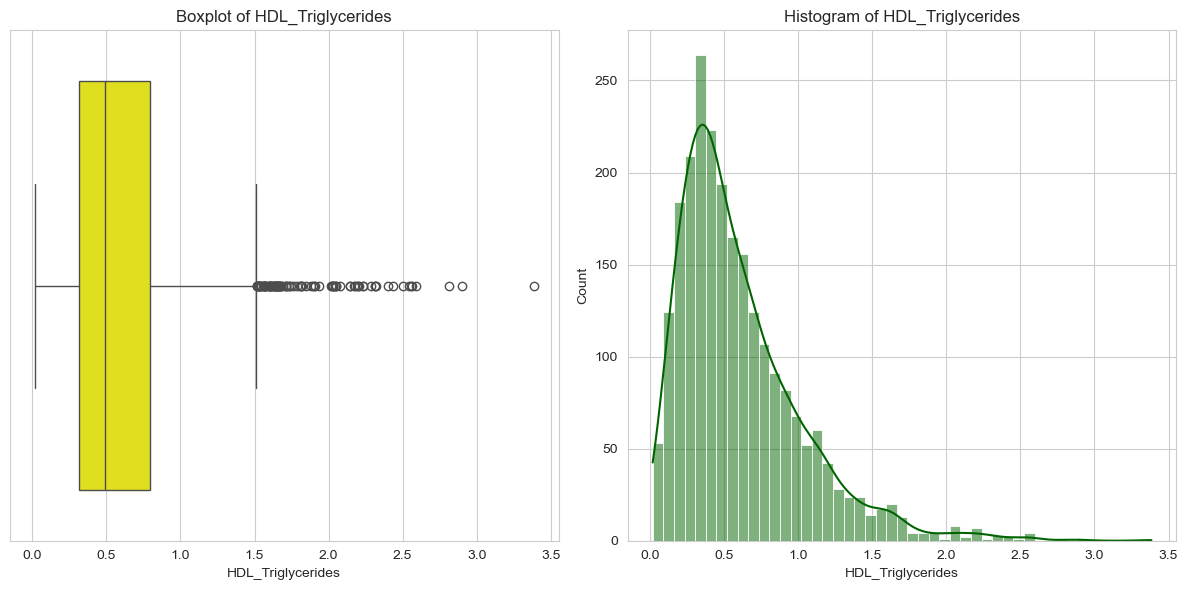

Shapiro-Wilk Test for Normality - p-value: 1.5231942255874915e-39
HDL_Triglycerides does NOT follow a normal distribution.


In [37]:
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
sns.boxplot(x=data["HDL_Triglycerides"], color = "yellow")
plt.title(f'Boxplot of HDL_Triglycerides')

plt.subplot(1, 2, 2)
sns.histplot(data["HDL_Triglycerides"], kde=True, color = "darkgreen")
plt.title(f'Histogram of HDL_Triglycerides')

plt.tight_layout()
plt.show()

stat, p_value = stats.shapiro(data["HDL_Triglycerides"].dropna())
print(f"Shapiro-Wilk Test for Normality - p-value: {p_value}")
if p_value > 0.05:
    print(f"HDL_Triglycerides follows a normal distribution.")
else:
    print(f"HDL_Triglycerides does NOT follow a normal distribution.")

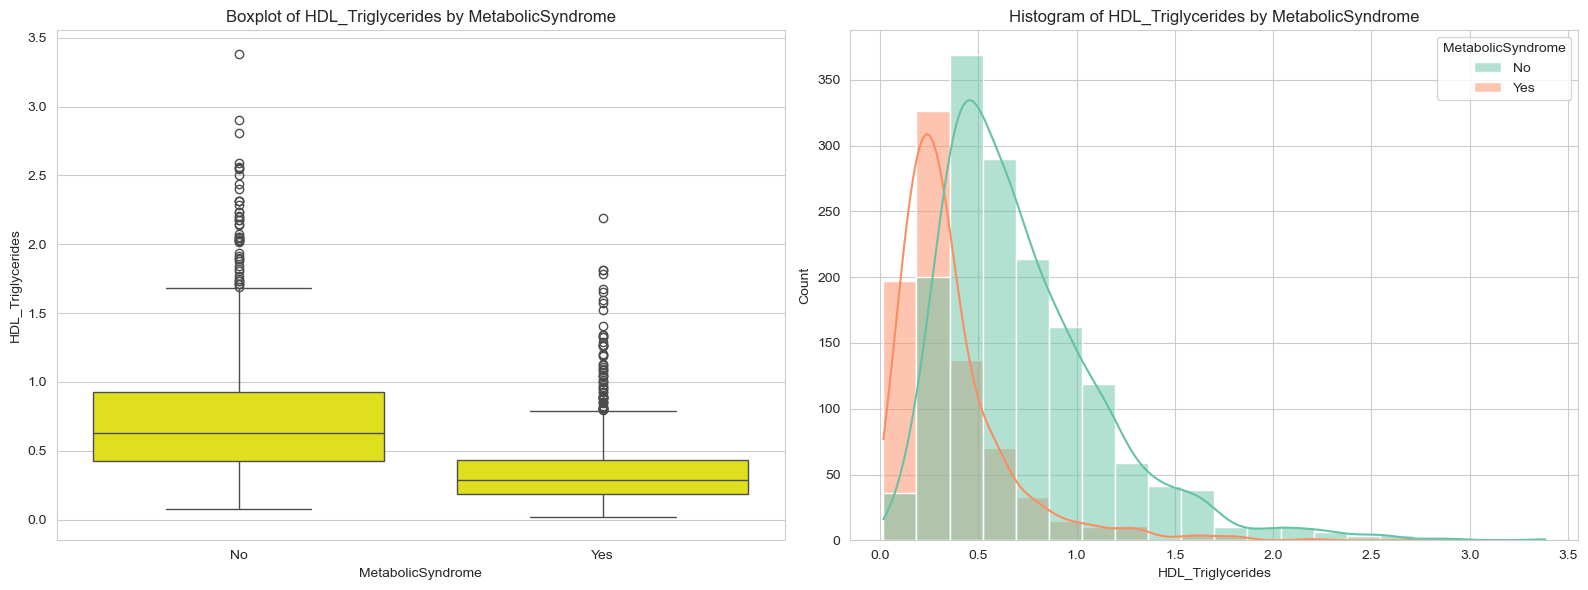

Mann-Whitney U test p-value: 4.548626470638027e-142


In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
sns.boxplot(x=data["MetabolicSyndrome"], y=data["HDL_Triglycerides"], ax=axes[0], color="yellow")
axes[0].set_title(f'Boxplot of HDL_Triglycerides by MetabolicSyndrome')

sns.histplot(data, x="HDL_Triglycerides", hue="MetabolicSyndrome", kde=True, ax=axes[1], palette='Set2', bins=20)
axes[1].set_title(f'Histogram of HDL_Triglycerides by MetabolicSyndrome')

plt.tight_layout()
plt.show()

group1 = data[data["MetabolicSyndrome"] == "No"]["HDL_Triglycerides"]
group2 = data[data["MetabolicSyndrome"] == "Yes"]["HDL_Triglycerides"]

if len(group1) > 0 and len(group2) > 0:
    u_stat, u_p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann-Whitney U test p-value: {u_p_value}")
else:
    print("One of the groups is NaN!")

We created a new variable representing the ratio of HDL and triglycerides, and we can see that we were able to better separate the target class compared to using these predictors individually. Next, we will create a ratio of BMI and WaistCirc to see if we get any improvement there.

In [39]:
data["BMI_WaistCirc"] = data["BMI"] / data["WaistCirc"]

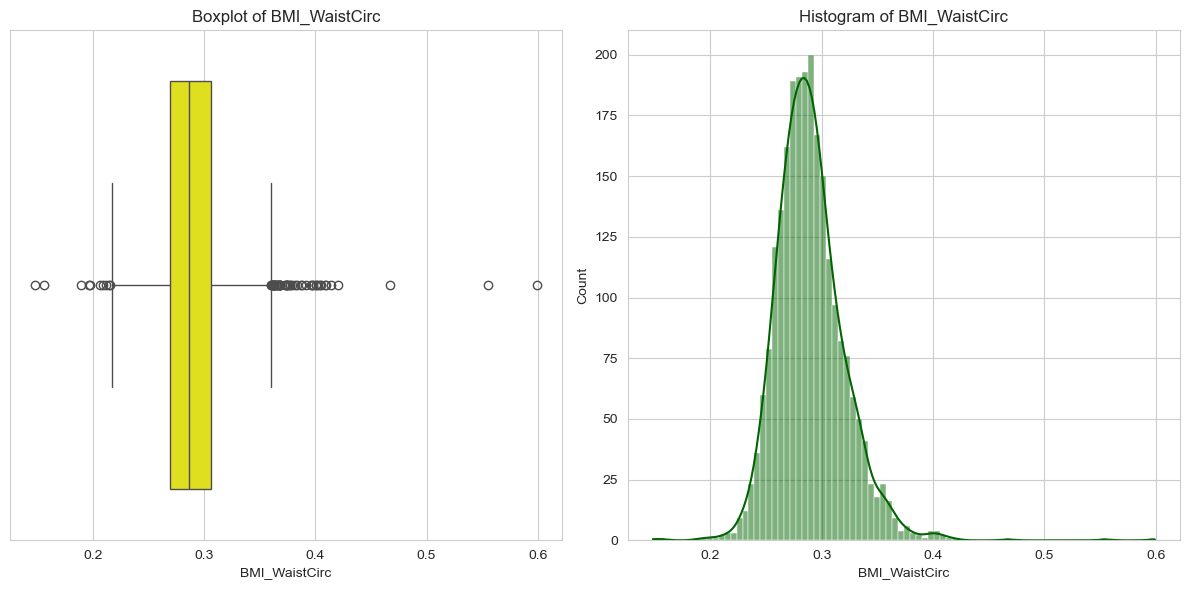

Shapiro-Wilk Test for Normality - p-value: 1.8419899585910972e-29
BMI_WaistCirc does NOT follow a normal distribution.


In [40]:
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
sns.boxplot(x=data["BMI_WaistCirc"], color = "yellow")
plt.title(f'Boxplot of BMI_WaistCirc')

plt.subplot(1, 2, 2)
sns.histplot(data["BMI_WaistCirc"], kde=True, color = "darkgreen")
plt.title(f'Histogram of BMI_WaistCirc')

plt.tight_layout()
plt.show()

stat, p_value = stats.shapiro(data["BMI_WaistCirc"].dropna())
print(f"Shapiro-Wilk Test for Normality - p-value: {p_value}")
if p_value > 0.05:
    print(f"BMI_WaistCirc follows a normal distribution.")
else:
    print(f"BMI_WaistCirc does NOT follow a normal distribution.")

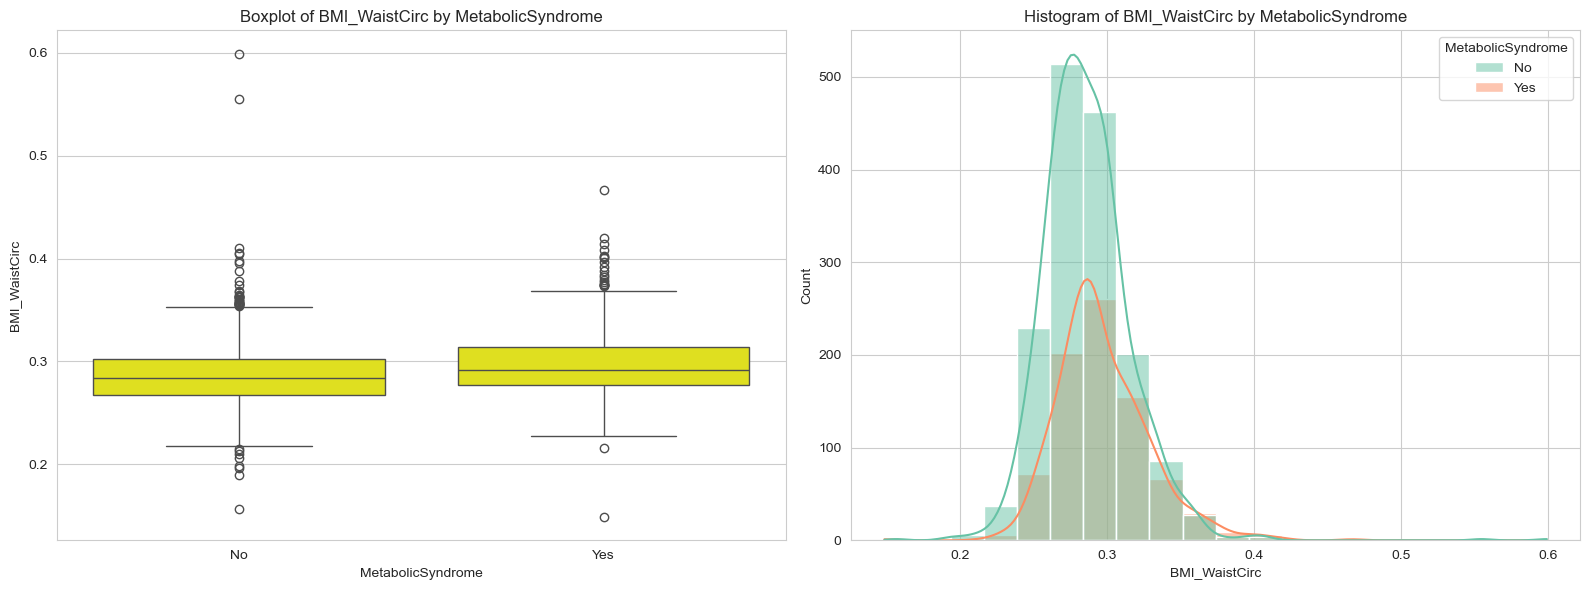

Mann-Whitney U test p-value: 8.628179167363088e-16


In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
sns.boxplot(x=data["MetabolicSyndrome"], y=data["BMI_WaistCirc"], ax=axes[0], color="yellow")
axes[0].set_title(f'Boxplot of BMI_WaistCirc by MetabolicSyndrome')

sns.histplot(data, x="BMI_WaistCirc", hue="MetabolicSyndrome", kde=True, ax=axes[1], palette='Set2', bins=20)
axes[1].set_title(f'Histogram of BMI_WaistCirc by MetabolicSyndrome')

plt.tight_layout()
plt.show()

group1 = data[data["MetabolicSyndrome"] == "No"]["BMI_WaistCirc"]
group2 = data[data["MetabolicSyndrome"] == "Yes"]["BMI_WaistCirc"]

if len(group1) > 0 and len(group2) > 0:
    u_stat, u_p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann-Whitney U test p-value: {u_p_value}")
else:
    print("One of the groups is NaN!")

This ratio doesn't create a good separation between classes, but the Mann-Whitney test shows that it has an impact on the target. We will rather use only WaistCirc variable, because it have better result for importance test and also have better separation. From pairplot we can see that HDL and WaistCirc have reasonable separation beetwen classes. Let's make new variable and see their importance.

In [42]:
data["HDL_WaistCirc"] = data["HDL"] / data["WaistCirc"]

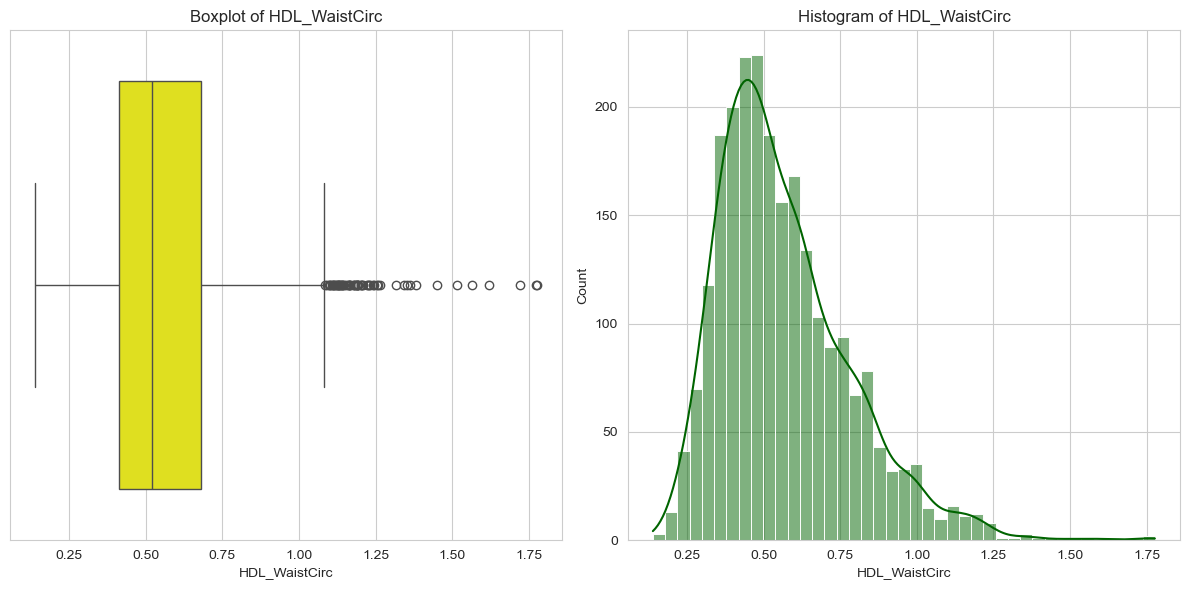

Shapiro-Wilk Test for Normality - p-value: 3.298290712744044e-31
HDL_Waist_Circ does NOT follow a normal distribution.


In [43]:
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
sns.boxplot(x=data["HDL_WaistCirc"], color = "yellow")
plt.title(f'Boxplot of HDL_WaistCirc')

plt.subplot(1, 2, 2)
sns.histplot(data["HDL_WaistCirc"], kde=True, color = "darkgreen")
plt.title(f'Histogram of HDL_WaistCirc')

plt.tight_layout()
plt.show()

stat, p_value = stats.shapiro(data["HDL_WaistCirc"].dropna())
print(f"Shapiro-Wilk Test for Normality - p-value: {p_value}")
if p_value > 0.05:
    print(f"HDL_Waist_Circ follows a normal distribution.")
else:
    print(f"HDL_Waist_Circ does NOT follow a normal distribution.")

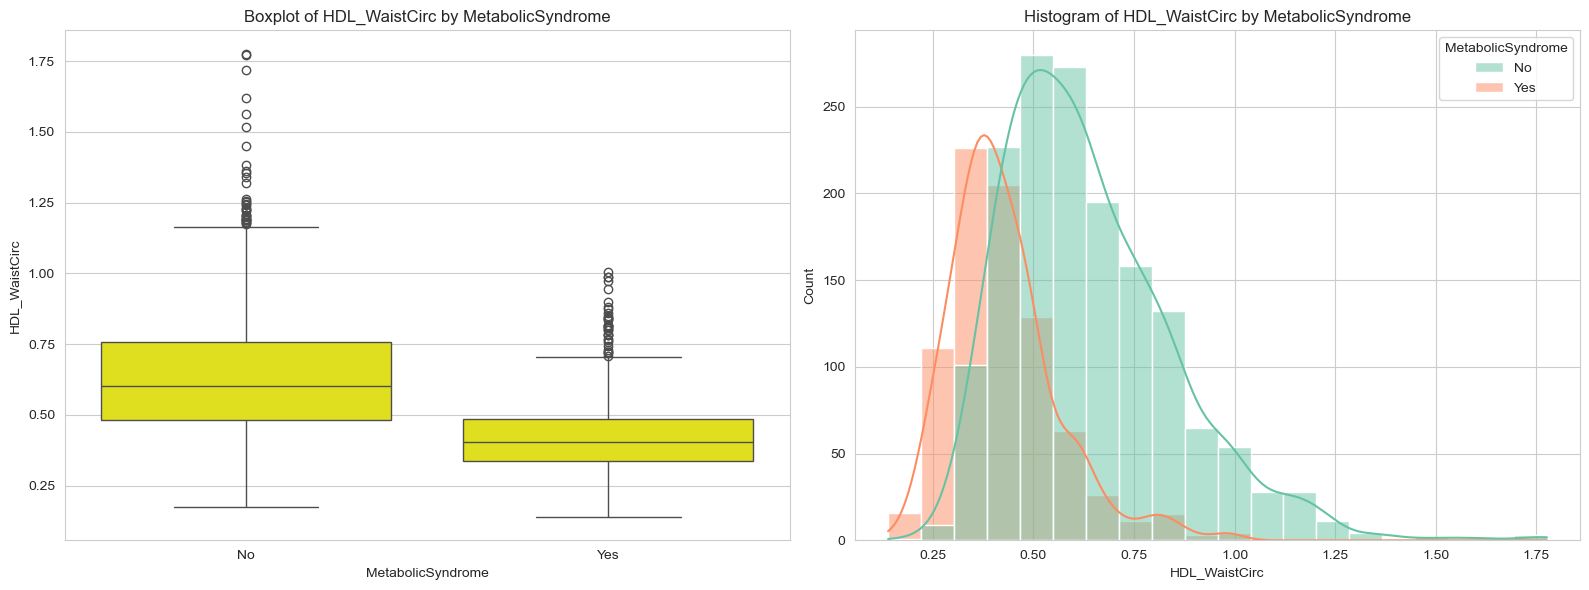

Mann-Whitney U test p-value: 2.1013809850372803e-145


In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
sns.boxplot(x=data["MetabolicSyndrome"], y=data["HDL_WaistCirc"], ax=axes[0], color="yellow")
axes[0].set_title(f'Boxplot of HDL_WaistCirc by MetabolicSyndrome')

sns.histplot(data, x="HDL_WaistCirc", hue="MetabolicSyndrome", kde=True, ax=axes[1], palette='Set2', bins=20)
axes[1].set_title(f'Histogram of HDL_WaistCirc by MetabolicSyndrome')

plt.tight_layout()
plt.show()

group1 = data[data["MetabolicSyndrome"] == "No"]["HDL_WaistCirc"]
group2 = data[data["MetabolicSyndrome"] == "Yes"]["HDL_WaistCirc"]

if len(group1) > 0 and len(group2) > 0:
    u_stat, u_p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann-Whitney U test p-value: {u_p_value}")
else:
    print("One of the groups is NaN!")

We created a new variable that has a strong impact on our target, greater than WaistCirc and HDL. In the modeling section, we will check the **VIF factors** for our variables when creating the logistic regression model. For other models, this won't be relevant. Now, we will scale the data.

In [45]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data

Age     Sex  Marital    Income         Race  WaistCirc       BMI  \
0    -1.510633    Male   Single  1.444467        White  -1.075285 -0.809556   
1    -0.260294  Female  Married  0.168375        White  -1.131325 -0.824639   
2    -1.567466    Male   Single -1.107717        Asian  -1.785129 -1.292216   
3    -0.317128  Female   Single -0.693849        Black   1.378035  0.698757   
4     0.137541    Male  Married  0.671914        Asian  -1.069058 -1.292216   
...        ...     ...      ...       ...          ...        ...       ...   
2396 -0.032960  Female  Married -1.038739        Other   0.082881  4.680702   
2397 -1.055964  Female   Single -0.693849        Asian  -1.167440 -1.608961   
2398 -1.169631    Male   Single -1.107717  MexAmerican   0.157602  0.110515   
2399 -1.226465    Male  Married  1.444467  MexAmerican   0.518750  0.397094   
2400  0.649043    Male   Single  0.754687        White   0.518750 -0.176064   

      Albuminuria   UrAlbCr  UricAcid  BloodGlucose       HDL  Triglycerides  \
0     First class -0.260698 -0.402490     -0.464411 -0.814614      -0.463592   
1     First class -0.201203 -0.681653     -0.754515 -1.670474      -0.759789   
2     First class -0.245538 -0.053536     -0.029254 -0.682943      -0.527063   
3     First class -0.243627 -0.332699     -0.116285  1.292121       0.139380   
4     First class -0.206554 -0.332699     -0.377379 -0.682943      -0.019297   
...           ...       ...       ...           ...       ...            ...   
2396  First class -0.028451  0.225626      1.276216  0.238754      -0.220288   
2397  First class -0.273183  1.691231     -0.493421  2.411324      -0.389543   
2398  First class -0.274712  0.504789     -0.261337 -0.419601      -0.463592   
2399  First class -0.257259  0.504789     -0.232327 -0.814614      -0.040454   
2400  First class -0.146804 -0.193118     -0.493421 -1.143791       1.038549   

     MetabolicSyndrome  HDL_Triglycerides  BMI_WaistCirc  HDL_WaistCirc  
0                   No          -0.273795      -0.072713      -0.280676  
1                   No          -0.245306      -0.008482      -1.008710  
2                   No          -0.122583      -0.035838       0.238322  
3                   No          -0.202875      -0.431365       0.184844  
4                   No          -0.625162      -1.361842      -0.168936  
...                ...                ...            ...            ...  
2396                No          -0.167027      10.021624       0.026680  
2397                No           0.924943      -2.057500       2.627644  
2398                No          -0.102860       0.057208      -0.466174  
2399               Yes          -0.650588       0.120491      -0.845762  
2400               Yes          -1.060652      -1.033779      -1.063807  

[2383 rows x 17 columns]

We scaled our data. Now, we will encode all categorical variables, but first we will make a copy of our data to use two different types of encoding for linear models and tree based models.

In [46]:
linear_model_data = data.copy(deep=True)
tree_based_model_data = data.copy(deep=True)

Categorical variables in dataset for linear models we will encode with OneHotEncoder, and categorical variables in dataset for tree based models wee will encode with LabelEncoder.

In [47]:
categorical_columns = linear_model_data.select_dtypes(include=['object', 'category']).columns
linear_model_data = pd.get_dummies(linear_model_data, columns=categorical_columns, drop_first=True)

label_encoder = LabelEncoder()
for col in tree_based_model_data.select_dtypes(include=['object', 'category']).columns:
    tree_based_model_data[col] = label_encoder.fit_transform(tree_based_model_data[col])

In [48]:
print("Linear Model Data After One-Hot Encoding:")
linear_model_data.head()

Linear Model Data After One-Hot Encoding:


Age    Income  WaistCirc       BMI   UrAlbCr  UricAcid  BloodGlucose  \
0 -1.510633  1.444467  -1.075285 -0.809556 -0.260698 -0.402490     -0.464411   
1 -0.260294  0.168375  -1.131325 -0.824639 -0.201203 -0.681653     -0.754515   
2 -1.567466 -1.107717  -1.785129 -1.292216 -0.245538 -0.053536     -0.029254   
3 -0.317128 -0.693849   1.378035  0.698757 -0.243627 -0.332699     -0.116285   
4  0.137541  0.671914  -1.069058 -1.292216 -0.206554 -0.332699     -0.377379   

        HDL  Triglycerides  HDL_Triglycerides  ...  Marital_Widowed  \
0 -0.814614      -0.463592          -0.273795  ...            False   
1 -1.670474      -0.759789          -0.245306  ...            False   
2 -0.682943      -0.527063          -0.122583  ...            False   
3  1.292121       0.139380          -0.202875  ...            False   
4 -0.682943      -0.019297          -0.625162  ...            False   

   Marital_nan  Race_Black  Race_Hispanic  Race_MexAmerican  Race_Other  \
0        False       False          False             False       False   
1        False       False          False             False       False   
2        False       False          False             False       False   
3        False        True          False             False       False   
4        False       False          False             False       False   

   Race_White  Albuminuria_Second class  Albuminuria_Third class  \
0        True                     False                    False   
1        True                     False                    False   
2       False                     False                    False   
3       False                     False                    False   
4       False                     False                    False   

   MetabolicSyndrome_Yes  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 26 columns]

In [49]:
print("\nTree-Based Model Data After Label Encoding:")
tree_based_model_data.head()


Tree-Based Model Data After Label Encoding:


Age  Sex  Marital    Income  Race  WaistCirc       BMI  Albuminuria  \
0 -1.510633    1        3  1.444467     5  -1.075285 -0.809556            0   
1 -0.260294    0        1  0.168375     5  -1.131325 -0.824639            0   
2 -1.567466    1        3 -1.107717     0  -1.785129 -1.292216            0   
3 -0.317128    0        3 -0.693849     1   1.378035  0.698757            0   
4  0.137541    1        1  0.671914     0  -1.069058 -1.292216            0   

    UrAlbCr  UricAcid  BloodGlucose       HDL  Triglycerides  \
0 -0.260698 -0.402490     -0.464411 -0.814614      -0.463592   
1 -0.201203 -0.681653     -0.754515 -1.670474      -0.759789   
2 -0.245538 -0.053536     -0.029254 -0.682943      -0.527063   
3 -0.243627 -0.332699     -0.116285  1.292121       0.139380   
4 -0.206554 -0.332699     -0.377379 -0.682943      -0.019297   

   MetabolicSyndrome  HDL_Triglycerides  BMI_WaistCirc  HDL_WaistCirc  
0                  0          -0.273795      -0.072713      -0.280676  
1                  0          -0.245306      -0.008482      -1.008710  
2                  0          -0.122583      -0.035838       0.238322  
3                  0          -0.202875      -0.431365       0.184844  
4                  0          -0.625162      -1.361842      -0.168936

Now, we finished **Feature Engineering** and **Data Preparation**, and we can move on on making predictive models.

## **Predictive Models**

### **Logistic Regression**

First, we will check the VIF factors of all significant predictors. Based on the significance tests, the only predictor that is not relevant is gender, so we will exclude it. For all other predictors, we will calculate the VIF factor, remove those critical for multicollinearity, and create the first logistic regression model. After that, we will perform permutation importance to narrow down the set of predictors further and create the second logistic regression model. For the third model, we will use backward selection, and for the fourth model, we will use forward selection.

In [50]:
X = linear_model_data.select_dtypes(include=[np.number])
X_with_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif_data

Variable         VIF
0               const    1.000000
1                 Age    1.309586
2              Income    1.025533
3           WaistCirc  113.293473
4                 BMI  172.322360
5             UrAlbCr    1.058581
6            UricAcid    1.224498
7        BloodGlucose    1.224058
8                 HDL   23.806753
9       Triglycerides    1.661437
10  HDL_Triglycerides    2.894113
11      BMI_WaistCirc   39.869769
12      HDL_WaistCirc   37.499875

Let's exclude BMI, WaistCirc, HDL and Triglycerides and see VIF factors.

In [51]:
X = linear_model_data.select_dtypes(include=[np.number])
X.drop(columns=["BMI", "WaistCirc", "HDL", "Triglycerides"], inplace=True)
X_with_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif_data

Variable       VIF
0              const  1.000000
1                Age  1.129719
2             Income  1.023262
3            UrAlbCr  1.051502
4           UricAcid  1.176659
5       BloodGlucose  1.163982
6  HDL_Triglycerides  2.085139
7      BMI_WaistCirc  1.110676
8      HDL_WaistCirc  2.296315

As we can see, we fixed multicolinearity problem, and now we can make our first logistic regression model. In model we will exclude Sex variable (Sex_Male because we did OneHotEncoding).

In [52]:
important_predictors = linear_model_data.drop(columns=["Sex_Male", "BMI", "WaistCirc", "HDL", "Triglycerides", 
                                                "MetabolicSyndrome_Yes"]).columns
important_predictors

Index(['Age', 'Income', 'UrAlbCr', 'UricAcid', 'BloodGlucose',
       'HDL_Triglycerides', 'BMI_WaistCirc', 'HDL_WaistCirc',
       'Marital_Married', 'Marital_Separated', 'Marital_Single',
       'Marital_Widowed', 'Marital_nan', 'Race_Black', 'Race_Hispanic',
       'Race_MexAmerican', 'Race_Other', 'Race_White',
       'Albuminuria_Second class', 'Albuminuria_Third class'],
      dtype='object')

Now, we can make our first logistic regression model. We will use cross validation and stratification to train and validate our model.

In [53]:
def evaluate_logreg_model(data, important_predictors, target_column, n_splits=5, random_state=42):

    X = data[important_predictors]
    y = data[target_column]
    
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    logreg_model = LogisticRegression()
    
    metrics_list = []
    
    for train_idx, val_idx in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
        
        logreg_model.fit(X_train, y_train)
        
        y_train_pred = logreg_model.predict(X_train)
        y_test_pred = logreg_model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        train_conf_matrix = confusion_matrix(y_train, y_train_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        metrics_list.append({
            'Fold': len(metrics_list)+1,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Train Confusion Matrix': train_conf_matrix,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Test Confusion Matrix': test_conf_matrix
        })
    
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

In [54]:
metrics_df = evaluate_logreg_model(linear_model_data, important_predictors, "MetabolicSyndrome_Yes")
metrics_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.814795         0.759717      0.664606        0.708986   
1     2        0.822665         0.760540      0.697063        0.727419   
2     3        0.825289         0.766102      0.698609        0.730800   
3     4        0.815417         0.756055      0.674383        0.712887   
4     5        0.829051         0.767947      0.710974        0.738363   

      Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1123, 136], [217, 430]]       0.832285        0.759494     0.740741   
1  [[1117, 142], [196, 451]]       0.805031        0.767442     0.611111   
2  [[1121, 138], [195, 452]]       0.802935        0.774194     0.592593   
3  [[1118, 141], [211, 437]]       0.846639        0.782051     0.757764   
4  [[1121, 139], [187, 460]]       0.779412        0.677019     0.672840   

   Test F1 Score   Test Confusion Matrix  
0       0.750000  [[277, 38], [42, 120]]  
1       0.680412   [[285, 30], [63, 99]]  
2       0.671329   [[287, 28], [66, 96]]  
3       0.769716  [[281, 34], [39, 122]]  
4       0.674923  [[262, 52], [53, 109]]

We have built a solid logistic regression model. There are no signs of overfitting, but improvements can certainly be made. The results from the cross-validation process show that the model achieves stable accuracy on the training set, ranging between 81.5% and 82.9%, while the test accuracy ranges from 77.9% to 84.7%, indicating good generalization ability. The model's precision on the training set is generally between 75% and 77%, meaning it correctly classifies positive predictions to a large extent, but there is still room for reducing false positives. On the other hand, recall is somewhat lower, between 66% and 71%, meaning the model misses some true positive cases, with test recall varying from 59.3% to 75.8%, suggesting the need for improvement in recognizing all positive instances. The F1 score, which balances precision and recall, ranges from 0.71 to 0.74 on the training set and from 0.67 to 0.77 on the test set, indicating the need for further optimization to achieve a better balance between precision and recall. Now, we will check what permutation importance reveals to further improve the model.

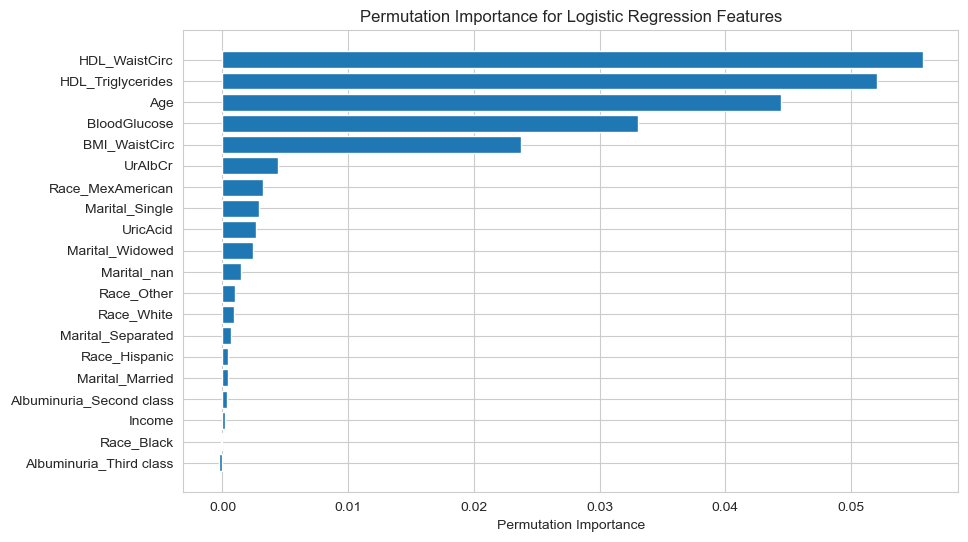

In [55]:
X = linear_model_data[important_predictors]  
y = linear_model_data["MetabolicSyndrome_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

results = permutation_importance(logreg_model, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=42)

importance = results.importances_mean

importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

importances_df = importances_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Logistic Regression Features')
plt.show()

Permutation importance shows that the most important predictors are HDL_WaistCirc, HDL_Triglycerides, Age, BloodGlucose, and BMI_WaistCirc. Now, we will check the metrics for the model using these predictors.

In [56]:
important_predictors = linear_model_data[["HDL_WaistCirc", "HDL_Triglycerides", "Age", "BloodGlucose", "BMI_WaistCirc"]].columns
metrics_df = evaluate_logreg_model(linear_model_data, important_predictors, "MetabolicSyndrome_Yes")
metrics_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.816369         0.760984      0.669243        0.712171   
1     2        0.826863         0.766387      0.704791        0.734300   
2     3        0.823190         0.760067      0.700155        0.728882   
3     4        0.819088         0.762565      0.679012        0.718367   
4     5        0.835343         0.779832      0.717156        0.747182   

      Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1123, 136], [214, 433]]       0.849057        0.777778     0.777778   
1  [[1120, 139], [191, 456]]       0.811321        0.772727     0.629630   
2  [[1116, 143], [194, 453]]       0.813417        0.796748     0.604938   
3  [[1122, 137], [208, 440]]       0.848739        0.783439     0.763975   
4  [[1129, 131], [183, 464]]       0.785714        0.694805     0.660494   

   Test F1 Score   Test Confusion Matrix  
0       0.777778  [[279, 36], [36, 126]]  
1       0.693878  [[285, 30], [60, 102]]  
2       0.687719   [[290, 25], [64, 98]]  
3       0.773585  [[281, 34], [38, 123]]  
4       0.677215  [[267, 47], [55, 107]]

We did not achieve any improvement; the model gave similar results as with all the predictors but a little bit better. Now, we will try forward and backward selection, which may reveal patterns in which predictor pairs produce good results.

In [57]:
important_predictors = linear_model_data.drop(columns=["MetabolicSyndrome_Yes"]).columns
important_predictors

Index(['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid',
       'BloodGlucose', 'HDL', 'Triglycerides', 'HDL_Triglycerides',
       'BMI_WaistCirc', 'HDL_WaistCirc', 'Sex_Male', 'Marital_Married',
       'Marital_Separated', 'Marital_Single', 'Marital_Widowed', 'Marital_nan',
       'Race_Black', 'Race_Hispanic', 'Race_MexAmerican', 'Race_Other',
       'Race_White', 'Albuminuria_Second class', 'Albuminuria_Third class'],
      dtype='object')

In [58]:
X = linear_model_data[important_predictors]  
y = linear_model_data["MetabolicSyndrome_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [59]:
def forward_selection(X_train, y_train):
    initial_features = X_train.columns.tolist()
    best_features = []
    
    while len(initial_features) > 0:
        feature_with_pvalue = []
        
        for feature in initial_features:
            model = LogisticRegression(solver='liblinear')  
            model.fit(X_train[best_features + [feature]], y_train)
            score = model.score(X_train[best_features + [feature]], y_train) 
            feature_with_pvalue.append((feature, score))
        
        feature_with_pvalue = sorted(feature_with_pvalue, key=lambda x: x[1], reverse=True)
        best_feature = feature_with_pvalue[0][0]
        
        if feature_with_pvalue[0][1] > 0.5:  
            best_features.append(best_feature)
            initial_features.remove(best_feature)
        else:
            break  
        
    return best_features

def backward_selection(X_train, y_train):
    initial_features = X_train.columns.tolist()
    
    while len(initial_features) > 0:
        model = LogisticRegression(solver='liblinear')
        model.fit(X_train[initial_features], y_train)
        coefs = model.coef_.flatten()
        min_coef_idx = abs(coefs).argmin()
        if abs(coefs[min_coef_idx]) < 0.01:
            initial_features.remove(X_train.columns[min_coef_idx])
        else:
            break
            
    return initial_features


forward_selected_features = forward_selection(X_train, y_train)
print("Forward Selected Features:", forward_selected_features)

backward_selected_features = backward_selection(X_train, y_train)
print("Backward Selected Features:", backward_selected_features)

Forward Selected Features: ['HDL_Triglycerides', 'BloodGlucose', 'BMI', 'UrAlbCr', 'Triglycerides', 'Age', 'WaistCirc', 'UricAcid', 'Race_Other', 'Race_Black', 'Marital_Married', 'Albuminuria_Third class', 'Income', 'Marital_Separated', 'Albuminuria_Second class', 'Marital_Widowed', 'Sex_Male', 'HDL', 'Marital_Single', 'BMI_WaistCirc', 'Marital_nan', 'HDL_WaistCirc', 'Race_Hispanic', 'Race_MexAmerican', 'Race_White']
Backward Selected Features: ['Age', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides', 'HDL_Triglycerides', 'BMI_WaistCirc', 'HDL_WaistCirc', 'Sex_Male', 'Marital_Married', 'Marital_Separated', 'Marital_Single', 'Marital_Widowed', 'Race_Black', 'Race_Hispanic', 'Race_MexAmerican', 'Race_Other', 'Race_White', 'Albuminuria_Second class', 'Albuminuria_Third class']


In [60]:
len(forward_selected_features)

25

In [61]:
len(backward_selected_features)

23

In [62]:
metrics_df = evaluate_logreg_model(linear_model_data, linear_model_data[forward_selected_features].columns, "MetabolicSyndrome_Yes")
metrics_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.833158         0.795332      0.684699        0.735880   
1     2        0.852571         0.819930      0.724884        0.769483   
2     3        0.844701         0.805217      0.715611        0.757774   
3     4        0.841636         0.800347      0.711420        0.753268   
4     5        0.851599         0.818182      0.723338        0.767842   

      Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1145, 114], [204, 443]]       0.888889        0.842767     0.827160   
1  [[1156, 103], [178, 469]]       0.821803        0.803150     0.629630   
2  [[1147, 112], [184, 463]]       0.834382        0.821705     0.654321   
3  [[1144, 115], [187, 461]]       0.848739        0.820144     0.708075   
4  [[1156, 104], [179, 468]]       0.808824        0.729032     0.697531   

   Test F1 Score   Test Confusion Matrix  
0       0.834891  [[290, 25], [28, 134]]  
1       0.705882  [[290, 25], [60, 102]]  
2       0.728522  [[292, 23], [56, 106]]  
3       0.760000  [[290, 25], [47, 114]]  
4       0.712934  [[272, 42], [49, 113]]

The **Forward Selection** method shows a slight improvement over the previous model in training performance, with accuracy ranging from 83.33% to 85.16% compared to 81.64% to 83.53% in the previous model. Precision and recall are also improved, with values ranging from 79.53% to 81.82% for precision and 68.47% to 72.33% for recall, compared to 76.10% to 77.98% and 66.92% to 71.72%, respectively, in the previous model. The F1 score for Forward Selection is higher, ranging from 73.59% to 76.78%, compared to 71.22% to 74.72%. In testing performance, Forward Selection outperforms the previous model, with accuracy ranging from 80.88% to 88.89% (compared to 78.51% to 84.87%), precision from 72.90% to 84.27% (compared to 69.48% to 77.98%), recall from 62.96% to 82.72% (compared to 60.49% to 77.38%), and F1 score from 70.59% to 83.49% (compared to 67.72% to 75.00%). Overall, Forward Selection provides consistent improvements in all metrics, indicating a better model.

In [63]:
metrics_df = evaluate_logreg_model(linear_model_data, linear_model_data[backward_selected_features].columns, "MetabolicSyndrome_Yes")
metrics_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.831584         0.790036      0.686244        0.734491   
1     2        0.853095         0.819130      0.727975        0.770867   
2     3        0.843127         0.803136      0.712519        0.755119   
3     4        0.841112         0.801047      0.708333        0.751843   
4     5        0.851599         0.817073      0.724884        0.768223   

      Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1141, 118], [203, 444]]       0.882600        0.831250     0.820988   
1  [[1155, 104], [176, 471]]       0.819706        0.796875     0.629630   
2  [[1146, 113], [186, 461]]       0.838574        0.829457     0.660494   
3  [[1145, 114], [189, 459]]       0.852941        0.827338     0.714286   
4  [[1155, 105], [178, 469]]       0.804622        0.722581     0.691358   

   Test F1 Score   Test Confusion Matrix  
0       0.826087  [[288, 27], [29, 133]]  
1       0.703448  [[289, 26], [60, 102]]  
2       0.735395  [[293, 22], [55, 107]]  
3       0.766667  [[291, 24], [46, 115]]  
4       0.706625  [[271, 43], [50, 112]]

The **Backward Selection** method shows an overall stronger performance compared to the previous model in both training and testing phases. In terms of **training performance**, the accuracy ranges from 83.16% to 85.16%, which is slightly higher than the previous model (81.64% to 83.53%). Precision and recall also show improvements, with precision ranging from 79.00% to 81.71% and recall from 68.62% to 72.49%, compared to 76.10% to 77.98% and 66.92% to 71.72%, respectively. The **F1 score** for Backward Selection is higher, ranging from 73.45% to 76.82%, compared to 71.22% to 74.72%. In the **testing phase**, Backward Selection shows better results than the previous model in accuracy (ranging from 80.46% to 88.26% compared to 78.51% to 84.87%), precision (72.26% to 83.13% compared to 69.48% to 77.98%), recall (62.95% to 82.20% compared to 60.49% to 77.38%), and F1 score (70.61% to 82.61% compared to 67.72% to 75.00%). Overall, Backward Selection provides a more consistent and reliable performance across all metrics.

**Forward** and **Backward** Selection show very similar results across all metrics; both methods have comparable training accuracy (83.32%-85.16% for **Forward** and 83.16%-85.16% for **Backward**), precision (79.53%-81.82% for **Forward** and 79.00%-81.71% for **Backward**), recall (68.47%-72.33% for **Forward** and 68.62%-72.49% for **Backward**), and F1 scores (73.59%-76.78% for **Forward** and 73.45%-76.82% for **Backward**). Testing performance is also similar, with **Forward** Selection showing test accuracy (80.88%-88.89%), precision (72.90%-84.28%), recall (62.93%-82.20%), and F1 scores (70.61%-82.61%), all very close to **Backward** Selection's results.

Overall, we have built solid logistic regression models, but we will try more complex tree-based models.

### **Decision Tree**

For the decision tree, we will use all predictors since the decision tree is resistant to multicollinearity. We will implement a function that utilizes stratification and cross-validation to show us the training and test metrics, similar to what we did with logistic regression.

In [64]:
important_predictors = tree_based_model_data.drop(columns=["MetabolicSyndrome"]).columns
important_predictors

Index(['Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'HDL_Triglycerides', 'BMI_WaistCirc', 'HDL_WaistCirc'],
      dtype='object')

In [65]:
def evaluate_decision_tree_model(data, important_predictors, target_column, n_splits=5, random_state=42,
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1):
    X = data[important_predictors]
    y = data[target_column]
    
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    decision_tree_model = DecisionTreeClassifier(
        max_depth=max_depth,              
        min_samples_split=min_samples_split,  
        min_samples_leaf=min_samples_leaf,    
        random_state=random_state
    )
    
    metrics_list = []
    
    for train_idx, val_idx in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
        
        decision_tree_model.fit(X_train, y_train)
        
        y_train_pred = decision_tree_model.predict(X_train)
        y_test_pred = decision_tree_model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, zero_division=0)
        train_recall = recall_score(y_train, y_train_pred, zero_division=0)
        train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
        train_conf_matrix = confusion_matrix(y_train, y_train_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
        test_conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        metrics_list.append({
            'Fold': len(metrics_list)+1,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Train Confusion Matrix': train_conf_matrix,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Test Confusion Matrix': test_conf_matrix
        })
    
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

In [66]:
results_df = evaluate_decision_tree_model(tree_based_model_data, important_predictors, "MetabolicSyndrome")
results_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1             1.0              1.0           1.0             1.0   
1     2             1.0              1.0           1.0             1.0   
2     3             1.0              1.0           1.0             1.0   
3     4             1.0              1.0           1.0             1.0   
4     5             1.0              1.0           1.0             1.0   

  Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1259, 0], [0, 647]]       0.859539        0.810458     0.765432   
1  [[1259, 0], [0, 647]]       0.842767        0.773585     0.759259   
2  [[1259, 0], [0, 647]]       0.825996        0.761589     0.709877   
3  [[1259, 0], [0, 648]]       0.834034        0.746988     0.770186   
4  [[1260, 0], [0, 647]]       0.819328        0.723529     0.759259   

   Test F1 Score   Test Confusion Matrix  
0       0.787302  [[286, 29], [38, 124]]  
1       0.766355  [[279, 36], [39, 123]]  
2       0.734824  [[279, 36], [47, 115]]  
3       0.758410  [[273, 42], [37, 124]]  
4       0.740964  [[267, 47], [39, 123]]

The results indicate that the Decision Tree model achieves perfect performance on the training set across all folds, with 100% accuracy, precision, recall, and F1 score, as reflected in the confusion matrices showing no misclassifications. However, the model's performance on the test set shows noticeable overfitting. Test accuracy ranges from 81.9% to 85.9%, with precision, recall, and F1 scores significantly lower than the training metrics, indicating that the model does not generalize well to unseen data.  

When compared to the Logistic Regression results, the Decision Tree model performs better on the training set but worse on the test set. Logistic Regression showed consistent metrics between training and testing, which indicates better generalization. On the other hand, the Decision Tree overfits the training data, capturing noise rather than true patterns, which leads to slightly worse performance on the test set. This suggests that while Decision Trees can capture complex relationships, they require proper regularization (e.g., pruning or setting depth limits) to avoid overfitting.

Now we will create a Decision Tree model using all predictors and visualize its branches to identify which predictors are important.

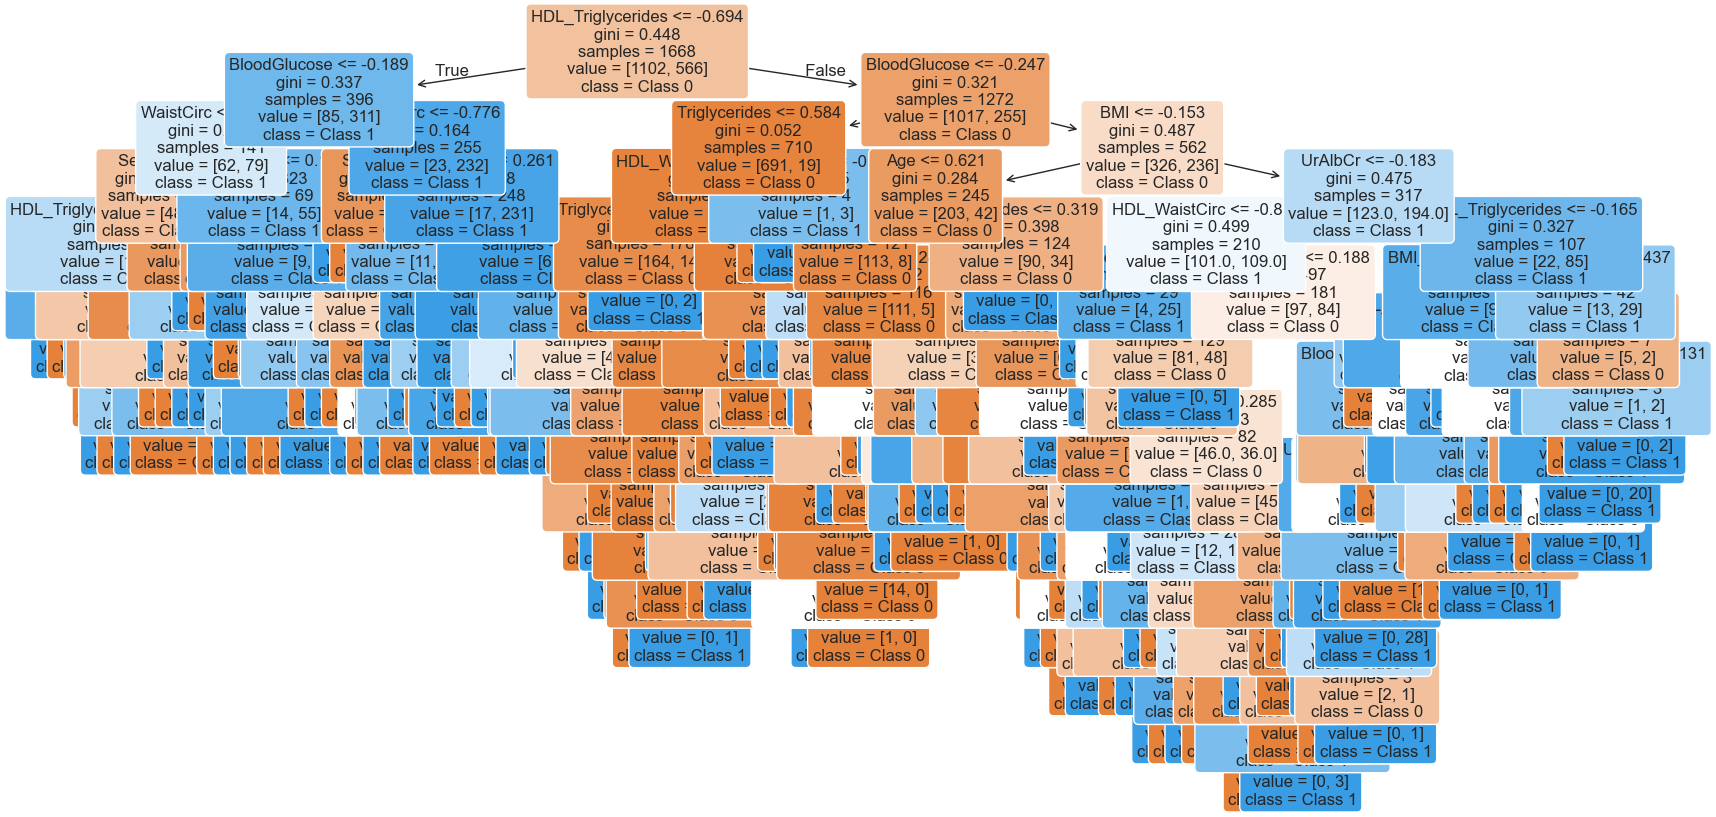

In [67]:
X = tree_based_model_data[important_predictors]  
y = tree_based_model_data["MetabolicSyndrome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree_model, 
    feature_names=X.columns, 
    class_names=['Class 0', 'Class 1'], 
    filled=True, 
    rounded=True,
    fontsize=12
)
plt.show()

The model is overly complex and overfitted. We will need to reduce the depth and branching. For chosing optimal hyperparameters we will use GridSearch with cross validation.

In [68]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [1, 2, 3, 4, None],  
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Hyperparameters:", grid_search.best_params_)

Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


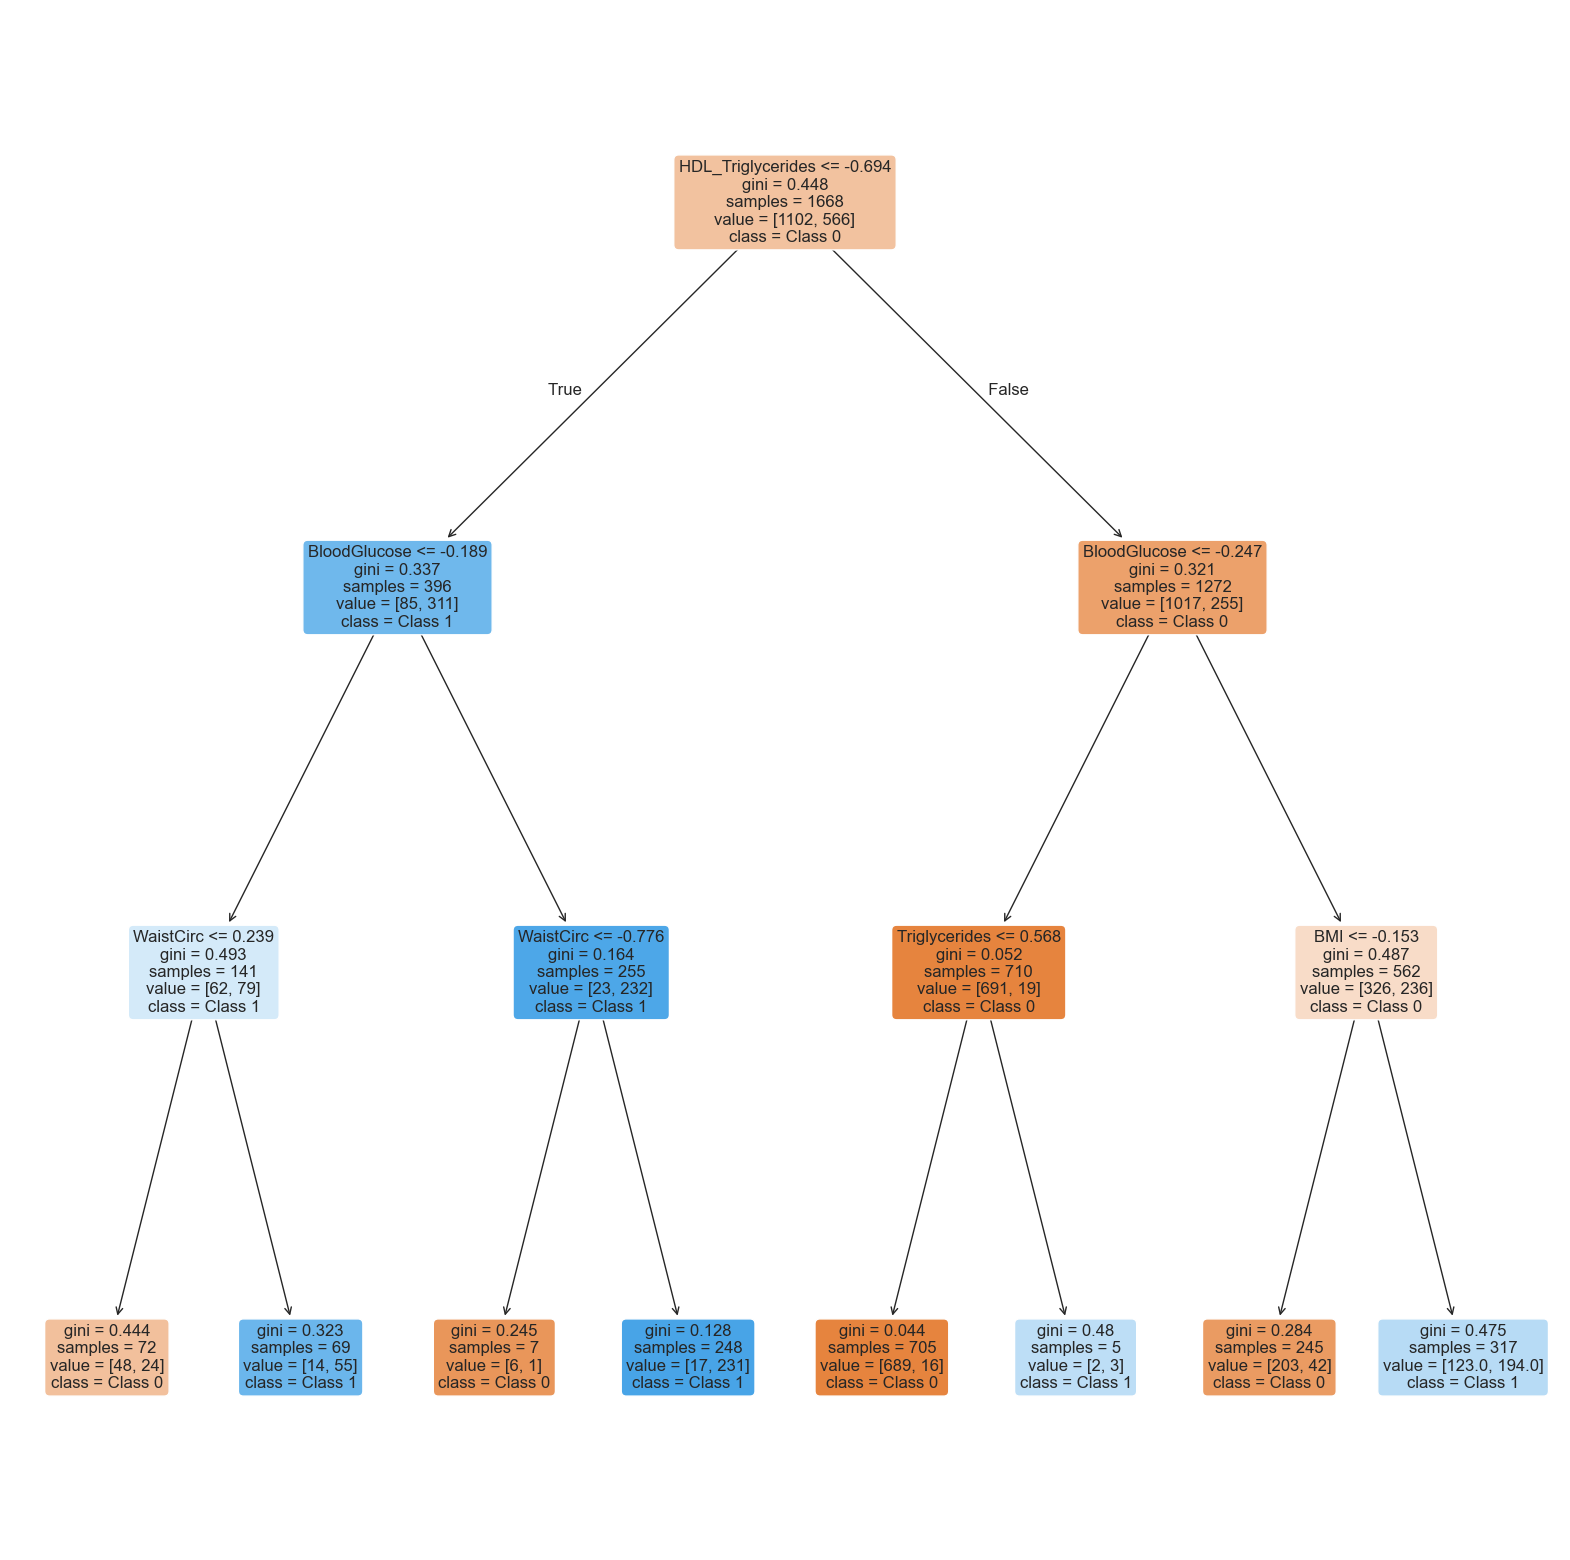

In [69]:
decision_tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=42)

decision_tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(
    decision_tree_model, 
    feature_names=X.columns, 
    class_names=['Class 0', 'Class 1'], 
    filled=True, 
    rounded=True,
    fontsize=12
)
plt.show()

Now, let's see metrics for our decision tree model with cross validation on all predictors.

In [70]:
results_df = evaluate_decision_tree_model(tree_based_model_data, important_predictors, 'MetabolicSyndrome',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=5
)
results_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.855194         0.753762      0.851623        0.799710   
1     2        0.858342         0.774381      0.822257        0.797601   
2     3        0.855194         0.759441      0.839258        0.797357   
3     4        0.862087         0.781845      0.824074        0.802404   
4     5        0.859990         0.763889      0.850077        0.804682   

      Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0   [[1079, 180], [96, 551]]       0.859539        0.762431     0.851852   
1  [[1104, 155], [115, 532]]       0.857442        0.767045     0.833333   
2  [[1087, 172], [104, 543]]       0.855346        0.785276     0.790123   
3  [[1110, 149], [114, 534]]       0.857143        0.788820     0.788820   
4   [[1090, 170], [97, 550]]       0.806723        0.680412     0.814815   

   Test F1 Score   Test Confusion Matrix  
0       0.804665  [[272, 43], [24, 138]]  
1       0.798817  [[274, 41], [27, 135]]  
2       0.787692  [[280, 35], [34, 128]]  
3       0.788820  [[281, 34], [34, 127]]  
4       0.741573  [[252, 62], [30, 132]]

We have achieved stable results for this decision tree model. We reduced overfitting and improved predictions on unseen data. Let's see results.

The decision tree model shows consistent performance across folds, with high train accuracy (around 85-86%) and good train F1 scores (around 0.80), indicating a stable model. Test performance varies slightly, with test accuracy ranging from 80.67% to 85.75%, and test F1 scores between 0.74 and 0.79. The model performs well in predicting the positive class (recall), but some variation in precision across folds suggests occasional trade-offs in classifying negative instances. There is space for improvment, so next model will be more complex tree based model.

### **Random Forest**

We will create Random Forest model with 100 latest Decision Tree models. After that we will use RandomizedSearch to find optimal hyperparameters and check the results.

In [71]:
def evaluate_random_forest_model(data, important_predictors, target_column, n_splits=5, random_state=42,
                                 n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                 max_features='sqrt', bootstrap=True):
    X = data[important_predictors]
    y = data[target_column]
    
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    random_forest_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=random_state,
        n_jobs=-1
    )
    
    metrics_list = []
    
    for train_idx, val_idx in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
        
        random_forest_model.fit(X_train, y_train)
        
        y_train_pred = random_forest_model.predict(X_train)
        y_test_pred = random_forest_model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, zero_division=0)
        train_recall = recall_score(y_train, y_train_pred, zero_division=0)
        train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
        train_conf_matrix = confusion_matrix(y_train, y_train_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
        test_conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        metrics_list.append({
            'Fold': len(metrics_list)+1,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Train Confusion Matrix': train_conf_matrix,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Test Confusion Matrix': test_conf_matrix
        })
    
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df


In [72]:
results_df = evaluate_random_forest_model(tree_based_model_data, important_predictors, 'MetabolicSyndrome',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=5
)
results_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.864638         0.852995      0.726430        0.784641   
1     2        0.860441         0.860113      0.703246        0.773810   
2     3        0.868311         0.872180      0.717156        0.787108   
3     4        0.857892         0.851024      0.705247        0.771308   
4     5        0.868380         0.852313      0.740340        0.792390   

     Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1178, 81], [177, 470]]       0.865828        0.822368     0.771605   
1  [[1185, 74], [192, 455]]       0.844864        0.849206     0.660494   
2  [[1191, 68], [183, 464]]       0.855346        0.878049     0.666667   
3  [[1179, 80], [191, 457]]       0.855042        0.828571     0.720497   
4  [[1177, 83], [168, 479]]       0.825630        0.792593     0.660494   

   Test F1 Score   Test Confusion Matrix  
0       0.796178  [[288, 27], [37, 125]]  
1       0.743056  [[296, 19], [55, 107]]  
2       0.757895  [[300, 15], [54, 108]]  
3       0.770764  [[291, 24], [45, 116]]  
4       0.720539  [[286, 28], [55, 107]]

The **Random Forest** model shows more consistent and balanced performance compared to the **Decision Tree** model. While both models have similar training accuracy, **Random Forest** excels in test accuracy and precision, with test accuracy ranging from **82.6% to 86.5%** and test precision between **79.2% and 84.9%**, indicating better specificity. On the other hand, the **Decision Tree** model demonstrates higher recall (from **66.0% to 81.5%**), meaning it captures more positive cases, but sacrifices precision (from **68.0% to 78.8%**). Despite this, **Random Forest** is generally the better model, providing a more reliable trade-off between precision and recall, while the **Decision Tree** might be more suited for cases where detecting as many positives as possible is the priority, even at the expense of precision.

Now, let's try with RandomizedSearch and find optimal parameters.

In [73]:
param_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None, 10, 20, 30, 40],    
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]               
}

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid,
    n_iter=100,  
    cv=5,        
    verbose=2,  
    random_state=42,
    n_jobs=-1    
)

random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': np.int64(50), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [74]:
results_df = evaluate_random_forest_model(tree_based_model_data, important_predictors, 'MetabolicSyndrome',
    n_estimators=50,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False
)
results_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.993704         0.987711      0.993818        0.990755   
1     2        0.996327         0.990798      0.998454        0.994611   
2     3        0.995278         0.990769      0.995363        0.993061   
3     4        0.994756         0.987768      0.996914        0.992320   
4     5        0.993707         0.989214      0.992272        0.990741   

  Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1251, 8], [4, 643]]       0.893082        0.840491     0.845679   
1  [[1253, 6], [1, 646]]       0.882600        0.839744     0.808642   
2  [[1253, 6], [3, 644]]       0.880503        0.834395     0.808642   
3  [[1251, 8], [2, 646]]       0.897059        0.868421     0.819876   
4  [[1253, 7], [5, 642]]       0.842437        0.757396     0.790123   

   Test F1 Score   Test Confusion Matrix  
0       0.843077  [[289, 26], [25, 137]]  
1       0.823899  [[290, 25], [31, 131]]  
2       0.821317  [[289, 26], [31, 131]]  
3       0.843450  [[295, 20], [29, 132]]  
4       0.773414  [[273, 41], [34, 128]]

What we can notice is that the model is better than the decision tree model, but it has a problem — it is slightly overfitted. Let's try reducing the number of predictors to the ones that the decision tree model identified as the best and find optimal parameters for them.

In [75]:
X = tree_based_model_data[["HDL_Triglycerides", "BloodGlucose", "Triglycerides", "WaistCirc", "BMI"]]  
y = tree_based_model_data["MetabolicSyndrome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None, 10, 20, 30, 40],    
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]               
}

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid,
    n_iter=100,  
    cv=5,        
    verbose=2,  
    random_state=42,
    n_jobs=-1    
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': np.int64(100), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


In [76]:
results_df = evaluate_random_forest_model(tree_based_model_data, ["HDL_Triglycerides", "BloodGlucose", "Triglycerides", "WaistCirc", "BMI"], 'MetabolicSyndrome',
    n_estimators=100,
    max_depth=50,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True
)
results_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.959077         0.950872      0.927357        0.938967   
1     2        0.955929         0.947536      0.921175        0.934169   
2     3        0.953830         0.948636      0.913447        0.930709   
3     4        0.961196         0.951258      0.933642        0.942368   
4     5        0.954903         0.945946      0.919629        0.932602   

    Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1228, 31], [47, 600]]       0.878407        0.813253     0.833333   
1  [[1226, 33], [51, 596]]       0.870021        0.828947     0.777778   
2  [[1227, 32], [56, 591]]       0.861635        0.815789     0.765432   
3  [[1228, 31], [43, 605]]       0.855042        0.787500     0.782609   
4  [[1226, 34], [52, 595]]       0.817227        0.721893     0.753086   

   Test F1 Score   Test Confusion Matrix  
0       0.823171  [[284, 31], [27, 135]]  
1       0.802548  [[289, 26], [36, 126]]  
2       0.789809  [[287, 28], [38, 124]]  
3       0.785047  [[281, 34], [35, 126]]  
4       0.737160  [[267, 47], [40, 122]]

The model using the predictors selected by the Decision Tree and optimized hyperparameters shows strong training performance with F1 scores above 0.93, but its test performance slightly drops, with F1 scores ranging from 0.73 to 0.82. It performs better on training data, indicating slight overfitting. In contrast, the model using all predictors and their original hyperparameters achieves near-perfect training results with F1 scores close to 1.0, suggesting potential overfitting. However, it maintains good test accuracy, ranging from 0.82 to 0.89, with consistent precision and recall. Overall, the model with Decision Tree-selected predictors and optimized hyperparameters strikes a better balance between training and test performance, making it the preferred choice. Lastly, let's try with boosting algorithm.

### **XGBClassifier**

In [77]:
def evaluate_boosting_model(data, important_predictors, target_column, n_splits=5, random_state=42,
                            n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1, colsample_bytree=1,
                            gamma=0, reg_alpha=0, reg_lambda=1):
    X = data[important_predictors]
    y = data[target_column]
    
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    xgb_model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=random_state,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    metrics_list = []
    
    for train_idx, val_idx in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
        
        xgb_model.fit(X_train, y_train)
        
        y_train_pred = xgb_model.predict(X_train)
        y_test_pred = xgb_model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, zero_division=0)
        train_recall = recall_score(y_train, y_train_pred, zero_division=0)
        train_f1 = f1_score(y_train, y_train_pred, zero_division=0)
        train_conf_matrix = confusion_matrix(y_train, y_train_pred)
        
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, zero_division=0)
        test_recall = recall_score(y_test, y_test_pred, zero_division=0)
        test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
        test_conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        metrics_list.append({
            'Fold': len(metrics_list)+1,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1 Score': train_f1,
            'Train Confusion Matrix': train_conf_matrix,
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1 Score': test_f1,
            'Test Confusion Matrix': test_conf_matrix
        })
    
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

Now, let's do RandomizedSearchCV for best parameters on all predictors and then on picked, as we did with RandomForest.

In [78]:
param_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [3, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': np.int64(200), 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [81]:
results_df = evaluate_boosting_model(tree_based_model_data, important_predictors, 'MetabolicSyndrome',
    subsample=1.0,
    reg_lambda=0.5,
    reg_alpha=0,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=0.6
)
results_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.933893         0.905132      0.899536        0.902326   
1     2        0.943337         0.913978      0.919629        0.916795   
2     3        0.937041         0.914961      0.897991        0.906396   
3     4        0.936550         0.917591      0.893519        0.905395   
4     5        0.941793         0.918750      0.908810        0.913753   

    Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0  [[1198, 61], [65, 582]]       0.914046        0.866667     0.882716   
1  [[1203, 56], [52, 595]]       0.882600        0.848684     0.796296   
2  [[1205, 54], [66, 581]]       0.893082        0.867550     0.808642   
3  [[1207, 52], [69, 579]]       0.890756        0.851613     0.819876   
4  [[1208, 52], [59, 588]]       0.844538        0.758824     0.796296   

   Test F1 Score   Test Confusion Matrix  
0       0.874618  [[293, 22], [19, 143]]  
1       0.821656  [[292, 23], [33, 129]]  
2       0.837061  [[295, 20], [31, 131]]  
3       0.835443  [[292, 23], [29, 132]]  
4       0.777108  [[273, 41], [33, 129]]

It's good relationship between test and train metrics, but let's see what will happen if we will use just a few most important predictors.

In [82]:
X = tree_based_model_data[["HDL_Triglycerides", "BloodGlucose", "Triglycerides", "WaistCirc", "BMI"]]  
y = tree_based_model_data["MetabolicSyndrome"]

param_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [3, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': np.int64(200), 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [83]:
results_df = evaluate_boosting_model(tree_based_model_data, ["HDL_Triglycerides", "BloodGlucose", "Triglycerides", "WaistCirc", "BMI"], 'MetabolicSyndrome',
    subsample=1.0,
    reg_lambda=0.5,
    reg_alpha=0,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=0.6
)
results_df

Fold  Train Accuracy  Train Precision  Train Recall  Train F1 Score  \
0     1        0.900315         0.854264      0.851623        0.852941   
1     2        0.901364         0.861417      0.845440        0.853354   
2     3        0.901889         0.866242      0.840804        0.853333   
3     4        0.907184         0.874404      0.848765        0.861394   
4     5        0.909806         0.871674      0.860896        0.866252   

     Train Confusion Matrix  Test Accuracy  Test Precision  Test Recall  \
0   [[1165, 94], [96, 551]]       0.884696        0.828221     0.833333   
1  [[1171, 88], [100, 547]]       0.880503        0.843137     0.796296   
2  [[1175, 84], [103, 544]]       0.867925        0.819355     0.783951   
3   [[1180, 79], [98, 550]]       0.865546        0.812903     0.782609   
4   [[1178, 82], [90, 557]]       0.827731        0.750000     0.740741   

   Test F1 Score   Test Confusion Matrix  
0       0.830769  [[287, 28], [27, 135]]  
1       0.819048  [[291, 24], [33, 129]]  
2       0.801262  [[287, 28], [35, 127]]  
3       0.797468  [[286, 29], [35, 126]]  
4       0.745342  [[274, 40], [42, 120]]

We succed to improve relationship between train and test metrics, but let's move on summary and see ROC and AUC and decide which model i best.

## **Summary**

In this comparison, we evaluate the performance of three different models—Logistic Regression, Decision Tree, and Random Forest—each with their respective optimizations.

The **best Logistic Regression model** is selected using permutation importance, which, while showing slightly lower performance compared to the more complex forward and backward selection models, still provides strong results. The metrics for this model show a solid performance on both the training and testing data, with train accuracy ranging from 81.6% to 83.5% and test accuracy between 78.5% and 85.0%. Despite being less complex, its precision, recall, and F1 scores indicate reliable performance, albeit with a tradeoff in some cases regarding recall. ROC curve:

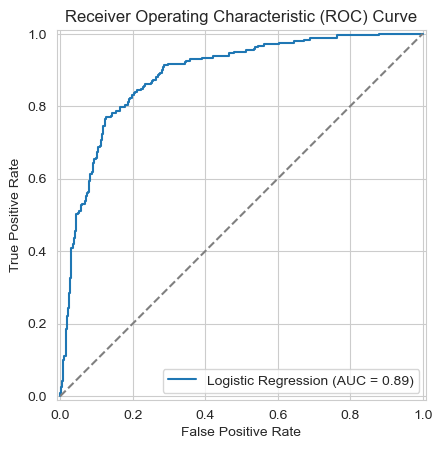

AUC: 0.89


In [85]:
X = linear_model_data[["HDL_WaistCirc", "HDL_Triglycerides", "Age", "BloodGlucose", "BMI_WaistCirc"]]  
y = linear_model_data["MetabolicSyndrome_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_test_prob = logreg_model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

print(f'AUC: {roc_auc:.2f}')

The **Decision Tree model**, which underwent regularization, demonstrates strong performance, especially on the training data. It achieves train accuracy from 85.5% to 86.2% and test accuracy ranging from 80.6% to 86.0%. With improved recall and F1 scores on the test set, it appears well-suited for capturing the underlying patterns, although it shows a higher training precision. The regularization process ensures better generalization to new data, though there is still room for improvement in balancing precision and recall on the test set. ROC curve:

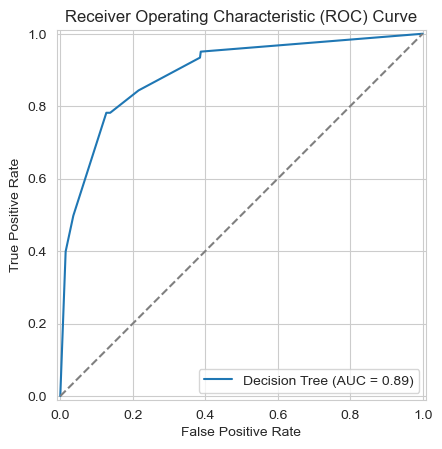

AUC: 0.89


In [86]:
X = tree_based_model_data[important_predictors]  
y = tree_based_model_data["MetabolicSyndrome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

decision_tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=5, random_state=42)
decision_tree_model.fit(X_train, y_train)

y_test_prob = decision_tree_model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

print(f'AUC: {roc_auc:.2f}')


The **Random Forest model**, also optimized through regularization and using the predictors identified by the Decision Tree as the best, shows the strongest overall performance. The train accuracy remains high (from 95.9% to 96.1%), and while the test accuracy ranges from 81.7% to 87.8%, it consistently outperforms both the Logistic Regression and Decision Tree models in terms of test precision, recall, and F1 score. This model strikes a good balance between precision and recall, with its F1 scores generally ranging from 0.74 to 0.84. ROC curve:

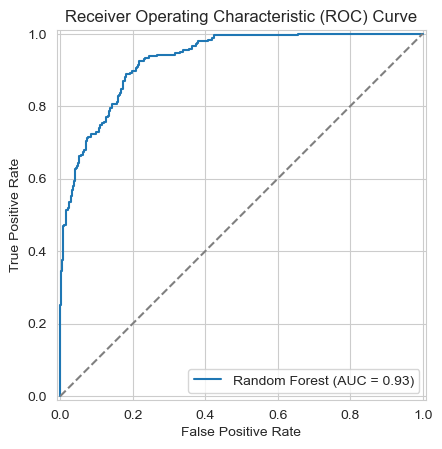

AUC: 0.93


In [87]:
X = tree_based_model_data[["HDL_Triglycerides", "BloodGlucose", "Triglycerides", "WaistCirc", "BMI"]]  
y = tree_based_model_data["MetabolicSyndrome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=50,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True
)
random_forest_model.fit(X_train, y_train)

y_test_prob = random_forest_model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

print(f'AUC: {roc_auc:.2f}')

The **XGBoost model**, optimized through hyperparameter tuning, delivers strong performance with train accuracy between 90.0% and 90.9% and test accuracy ranging from 82.7% to 88.5%. It maintains a good balance between precision (75.0% to 84.3%) and recall (74.0% to 83.3%), resulting in consistent F1 scores (0.74 to 0.83). The model generalizes well across folds, avoiding overfitting while maintaining robustness in distinguishing between classes.

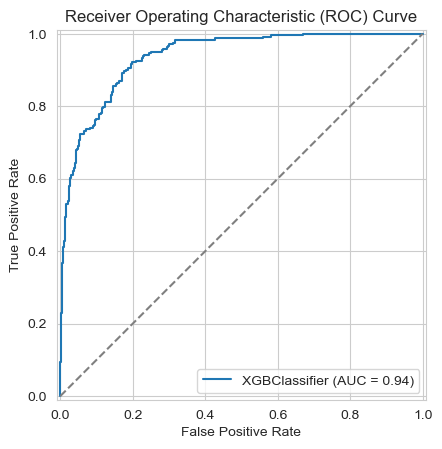

AUC: 0.94


In [88]:
X = tree_based_model_data[["HDL_Triglycerides", "BloodGlucose", "Triglycerides", "WaistCirc", "BMI"]]  
y = tree_based_model_data["MetabolicSyndrome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

xgboost_model = XGBClassifier(
    subsample=1.0,
    reg_lambda=0.5,
    reg_alpha=0,
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    gamma=0.2,
    colsample_bytree=0.6
)
xgboost_model.fit(X_train, y_train)

y_test_prob = xgboost_model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBClassifier')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

print(f'AUC: {roc_auc:.2f}')

The **Random Forest model** appears to be the best choice overall. While **XGBoost** achieves slightly higher test accuracy (82.7%–88.5% vs. 81.7%–87.8%) and similar F1 scores, **Random Forest** has significantly higher train accuracy (95.9%–96.1% vs. 90.0%–90.9%), indicating better learning capability. Additionally, it consistently outperforms **Logistic Regression** and **Decision Tree** in key metrics, while avoiding excessive overfitting. **XGBoost** remains a strong contender due to its robustness, but **Random Forest** provides the best balance between training performance, generalization, and overall stability